# Insurance Cost Prediction

Why do we need health insurance you might ask, especially if you're generally healthy. But there are many reasons for having one. First, your health matters the most, and health insurance is a way of helping protect your health.
Here are few ways health insurance can protect you: -
1. Health insurances are designed to help prepare for unexpected moments in your life, like accidents or illness.
2. Without health insurance, you could be faced with paying medical bills yourself, and health care can be expensive.
3. Health insurance can keep you on track with preventive care — which may be covered by insurance at 100%, in many cases. Regular doctor visits may help you stay healthier over time.

Anyone can get health insurance irrespective of their age, sex, or their place of living. And this project helps them to get an estimate of the price of their health insurance based on the factors listed below.

# Factors

* Age - Age of primary beneficiary
* Sex - Gender of the primary beneficiary
* BMI - Body Mass Index (kg / m^2). Ideal range is between 18.5 to 24.9
* Children - Number of children covered by health insurance / Number of dependents
* Smoker - Does the beneficiary smoke?
* Region - The beneficiary's residential area in the US, northeast, northwest, southeast, southwest
* Charges - Individual medical costs billed by health insurance (to be predicted)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sweetviz as sv
from scipy import stats

In [2]:
# Load the dataset
df = pd.read_csv('datasets_13720_18513_insurance.csv')
# Display the first few rows of the dataset
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


#### The factors that might affect the health insurance cost are:-

* Age: Age of the beneficiary
* Sex: Gender of the beneficiary
* BMI: Body Mass Index (kg / m^2)
* Children: Number of children / Number of dependants
* Smoker: Does smoke or not
* Region: Residential area of the beneficiary

In [3]:
# Show basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [4]:
df.isnull().values.any()

False

* No null Value in data.

In [5]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

### This shows a brief description of the Charges column.
#### Few observations:-

* The minimum cost of an insurance is 1122
* Around 75% of the charges are below 17,000
* The maximum cost of an insurance is 63770

## Exploratory Data Analysis

## Univariate Analysis

In [6]:
# Create the EDA report
report = sv.analyze(df)
# Display the report (optional)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Univariate analysis
1. the max age of the person is 64, minumum age is 18 and average age is 39 in the age columns
2. There are 51 % male and 49% femalein Sex columns
3. MAX BMI 53.1, MIN bmi 16.0 and AVG bmi. 95% people bmi are 41.1.
4. 41% people have distinct bmi.
5. 43 % people have no children, 24 % people have only 1 children, 18% people have 2 children, 12% people have 3 children, 2 % people have 4 children and only 1 % people have 5 children.
6. 80% people are no smoker and only 20 % people are smoker.
7. 27% people are from southeast, 24 % people from southwest, northeast and northwest.
8. Maximum people have insurance from north east.
9. The maximum cgarges are 63770. And the munumum charges are 1122.

### 1. Numerical Features: Histograms and box plots are useful here.

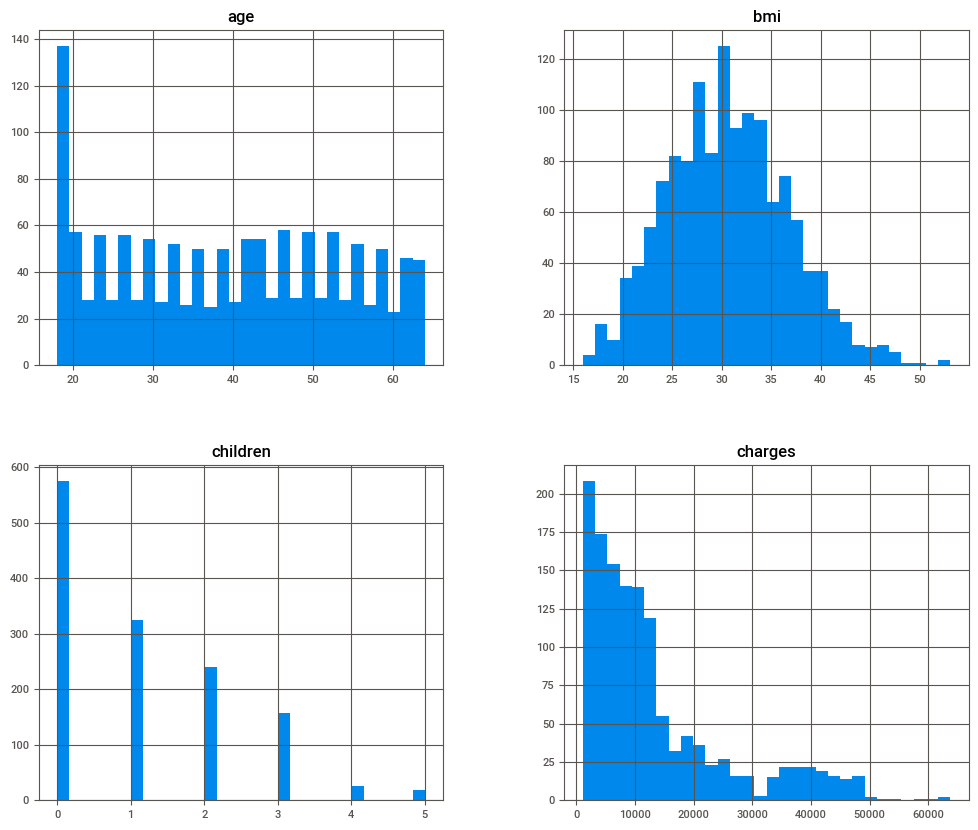

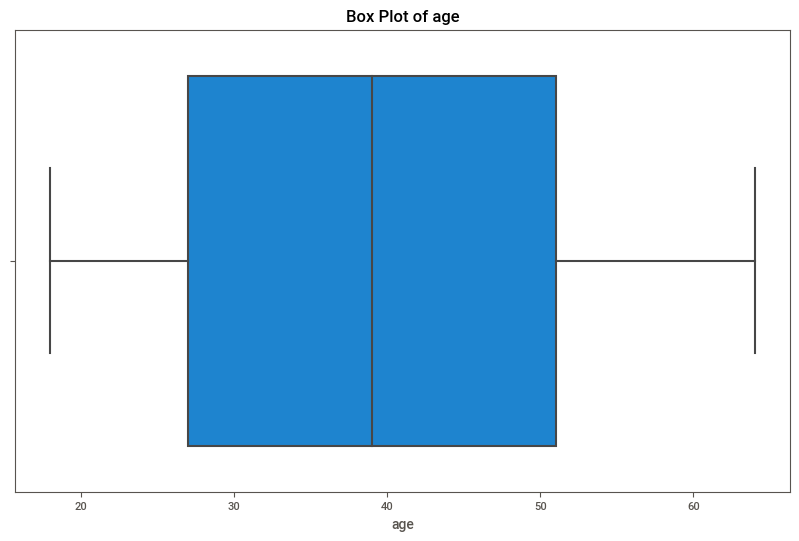

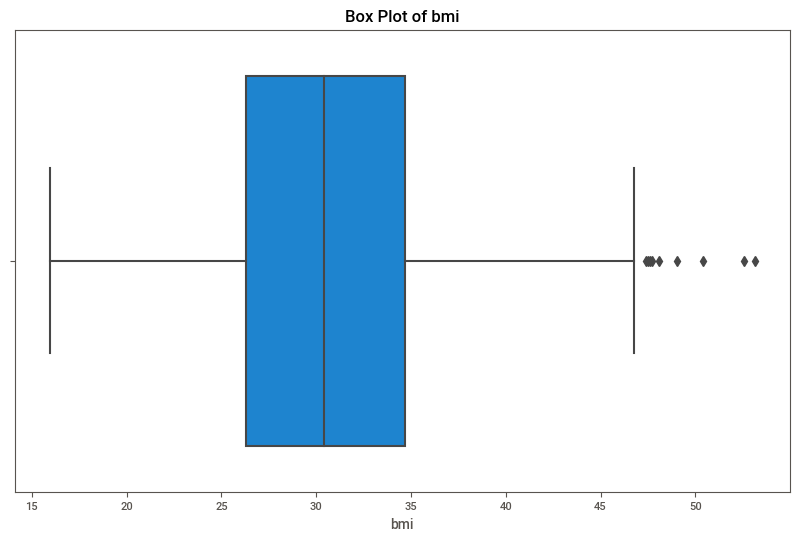

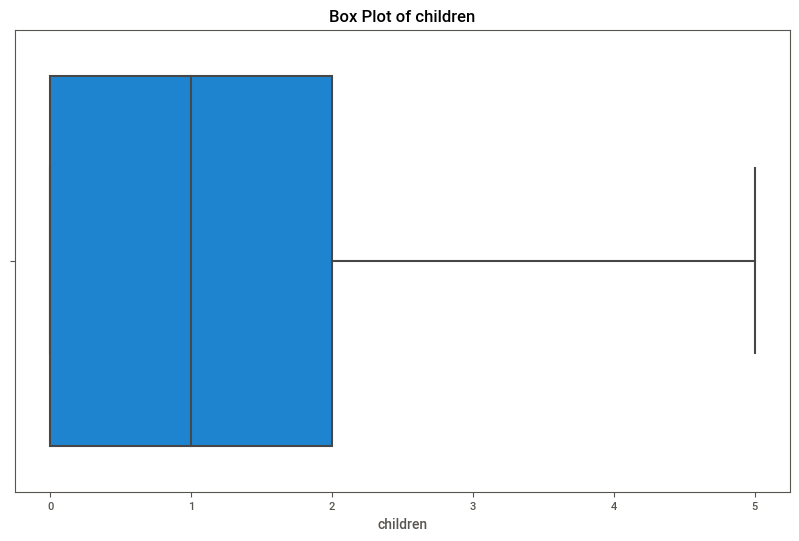

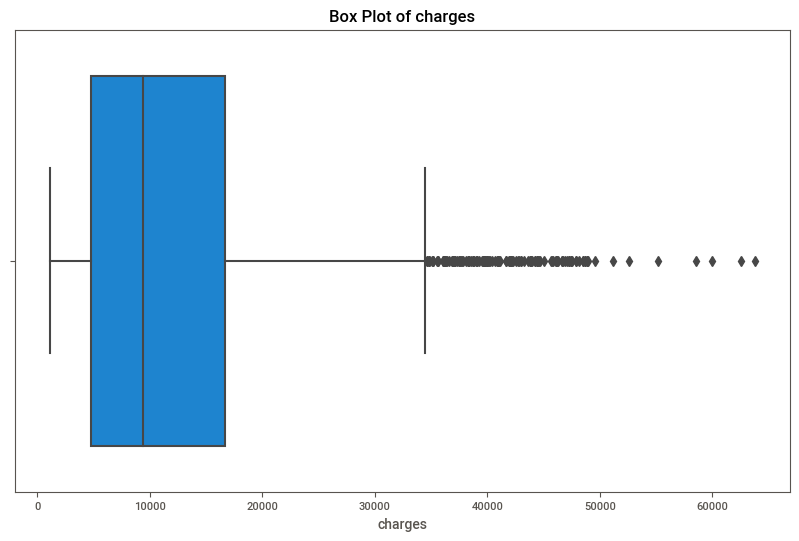

In [7]:
# Plot histograms for numerical columns
df.hist(figsize=(12, 10), bins=30)
plt.show()

# Box plots for numerical columns
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

### 2. Categorical Features: Bar plots for counts and proportions.

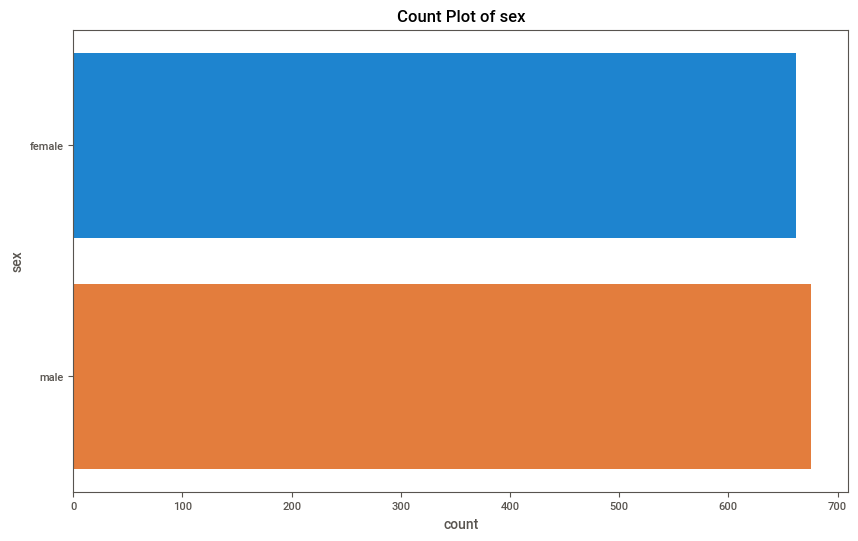

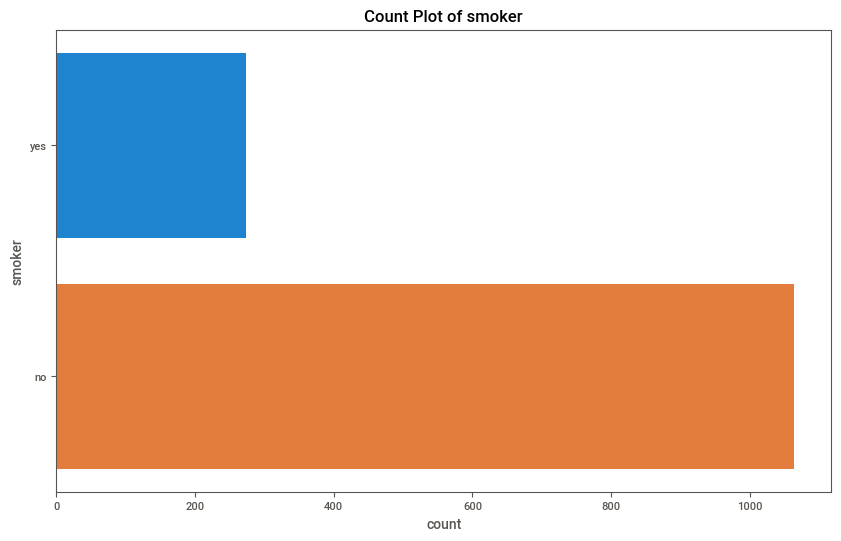

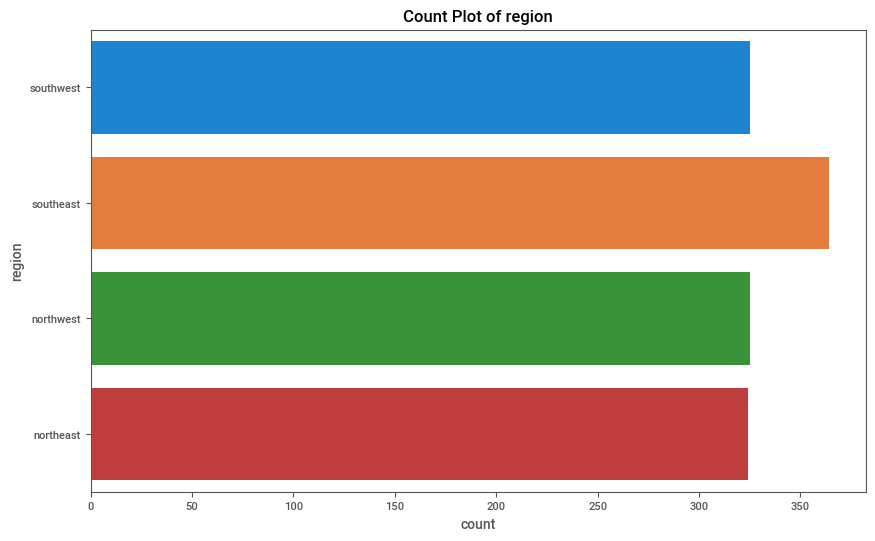

In [8]:
# Bar plots for categorical columns
for column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[column])
    plt.title(f'Count Plot of {column}')
    plt.show()

### Bivariate Analysis

#### Let's analyze the medical insurance charges by age, bmi and children according to the smoking factor

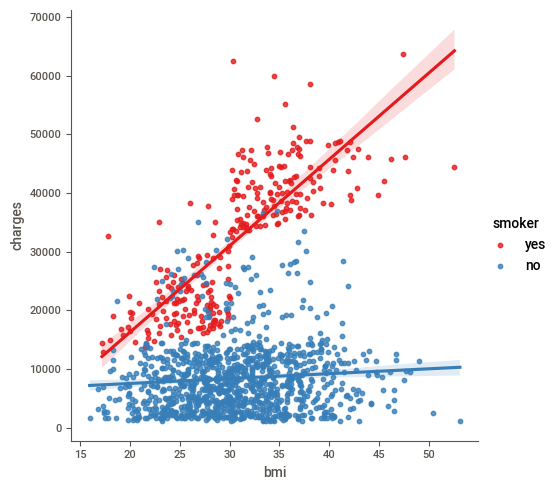

In [9]:
sns.lmplot( x='bmi',y='charges', data=df, hue='smoker', palette='Set1', scatter_kws={"s": 10})
plt.show()

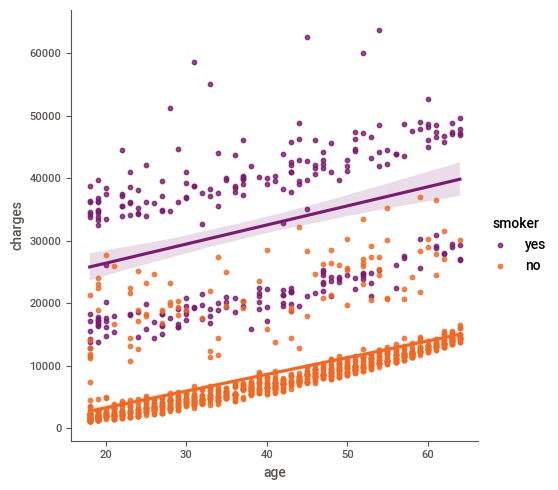

In [10]:
sns.lmplot(x='age', y='charges', hue='smoker', data=df, palette='inferno', scatter_kws={"s": 10})
plt.show()

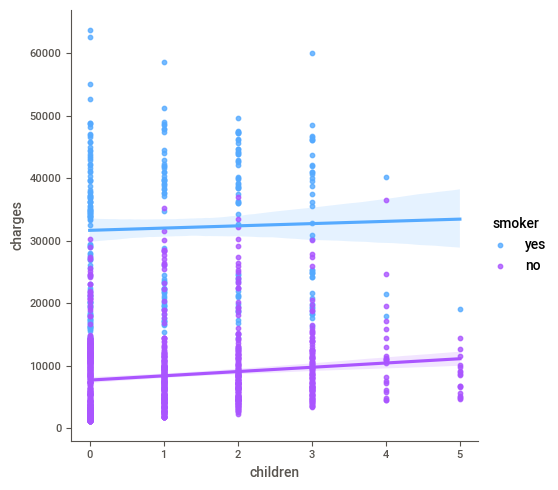

In [11]:
sns.lmplot(x='children', y='charges', hue='smoker', data=df, palette='cool', scatter_kws={"s": 10})
plt.show()

* Smoking has the highest impact on the medical insurance costs, even though costs are increasing with age, bmi and children. Also people with children tend to smoke less.

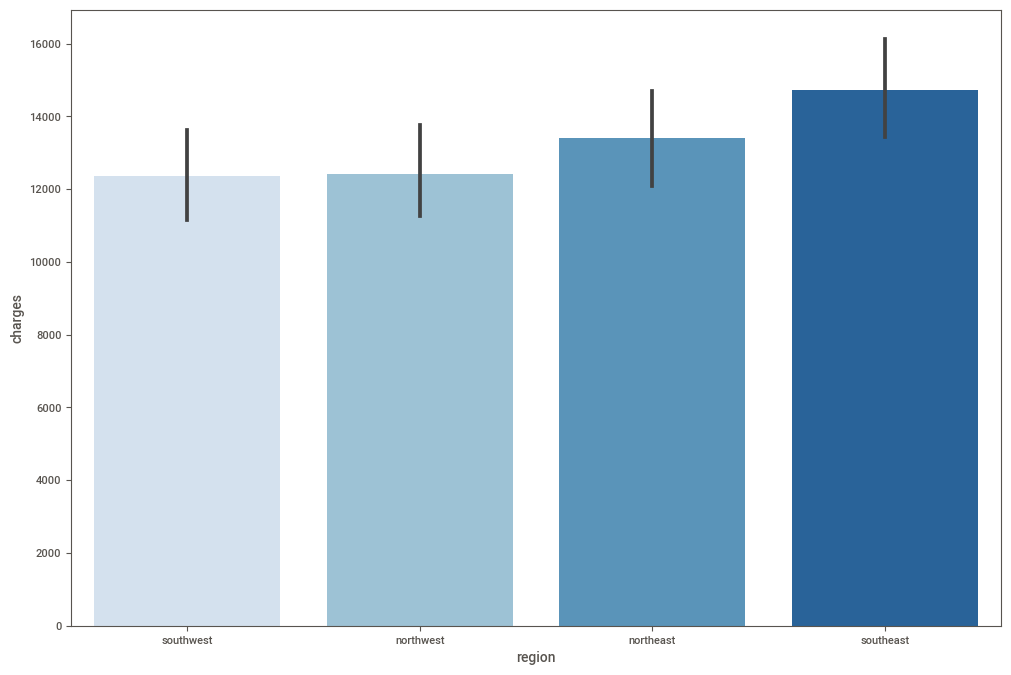

In [12]:
f, axs = plt.subplots(1, 1, figsize=(12, 8))
plot_order = df.groupby('region')['charges'].sum().sort_values(ascending=True).index.values
sns.barplot(x='region', y='charges', data=df, palette='Blues', order=plot_order)
plt.show()

* So overall the highest medical insurance charges are in the Southeast and the lowest are in the Southwest.

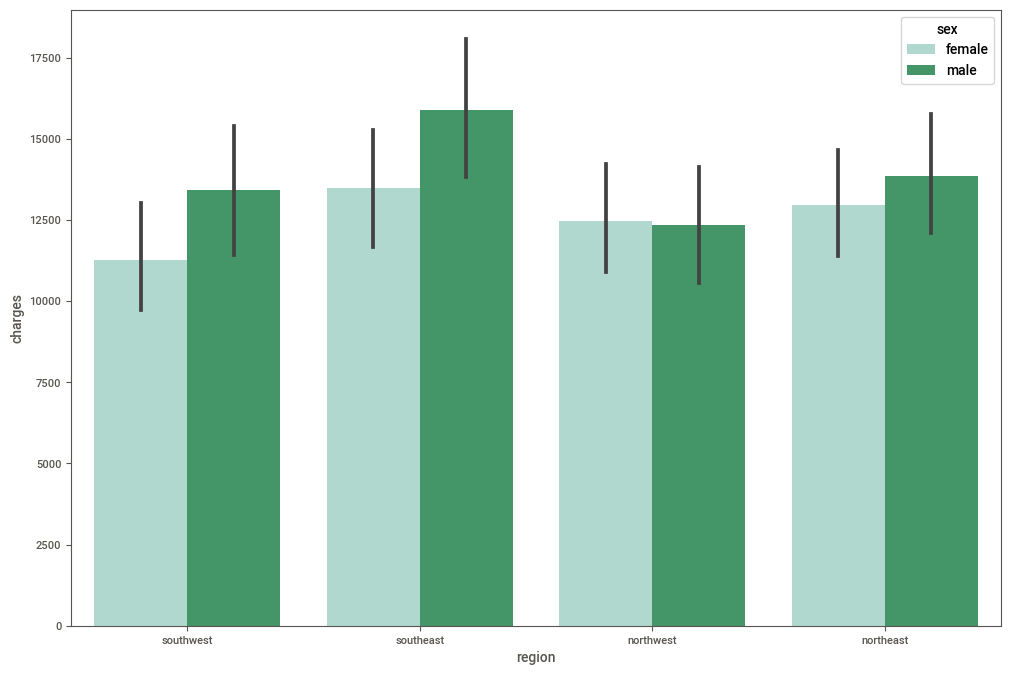

In [13]:
f, axs = plt.subplots(1,1, figsize=(12,8))
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='BuGn')
plt.show()

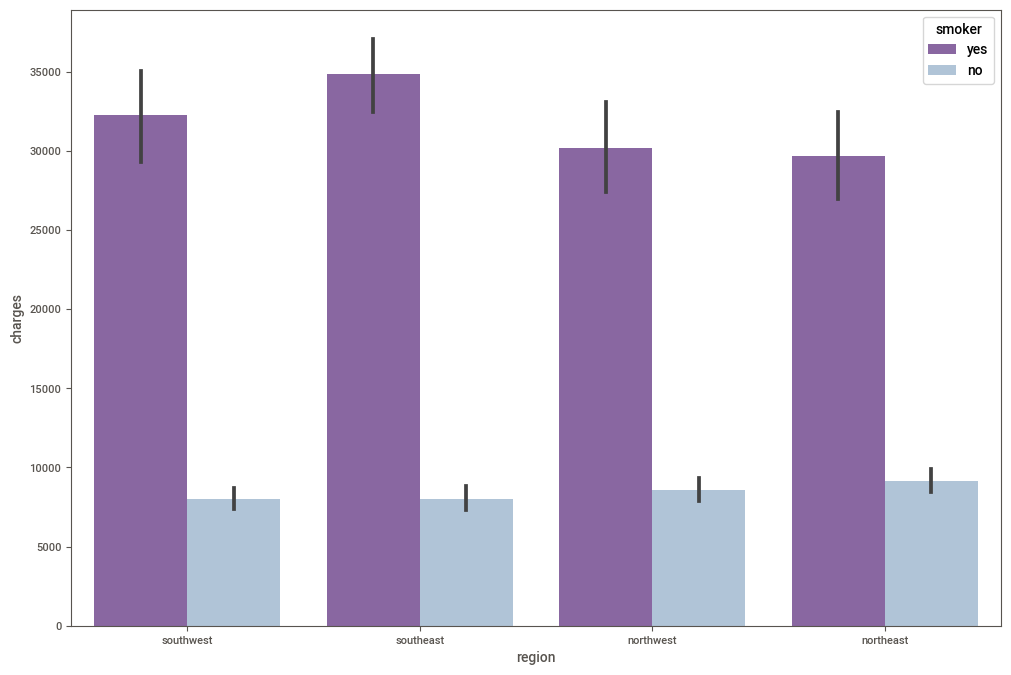

In [14]:
f, axs = plt.subplots(1,1, figsize=(12,8))
sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='BuPu_r')
plt.show()

* If the person smokes, insurance charges are higher than for the person who does not smoke.

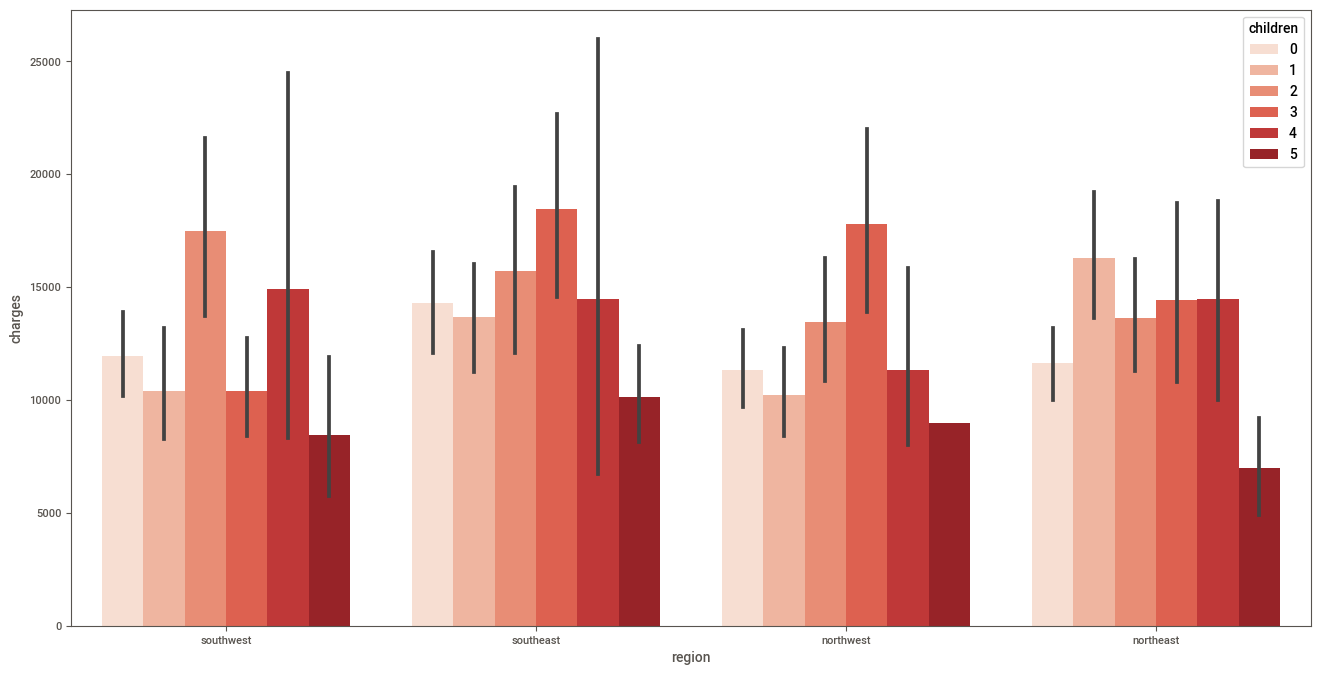

In [15]:
f, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.barplot(x='region', y='charges', hue='children', data=df, palette='Reds')
plt.show()

* From the above graphs we can say that the highest charges are still in Southeast. People in Southeast smoke more than people in Northeast, but people in Northeast have higher charges by gender than in Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well.

In [16]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicate rows
print(df.duplicated().sum())

# Display unique values for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
1
['sex', 'smoker', 'region']


## Explore relationships between features, especially with respect to the target variable.

### 1. Numerical vs. Numerical: Scatter plots and correlation matrices.

#### 1. Categorical vs. Numerical: Box plots and violin plots.

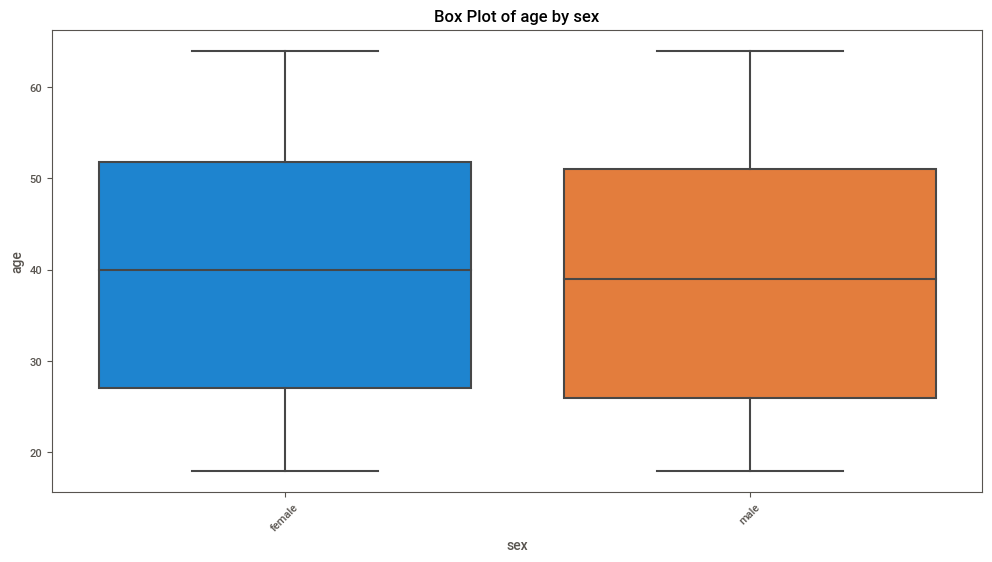

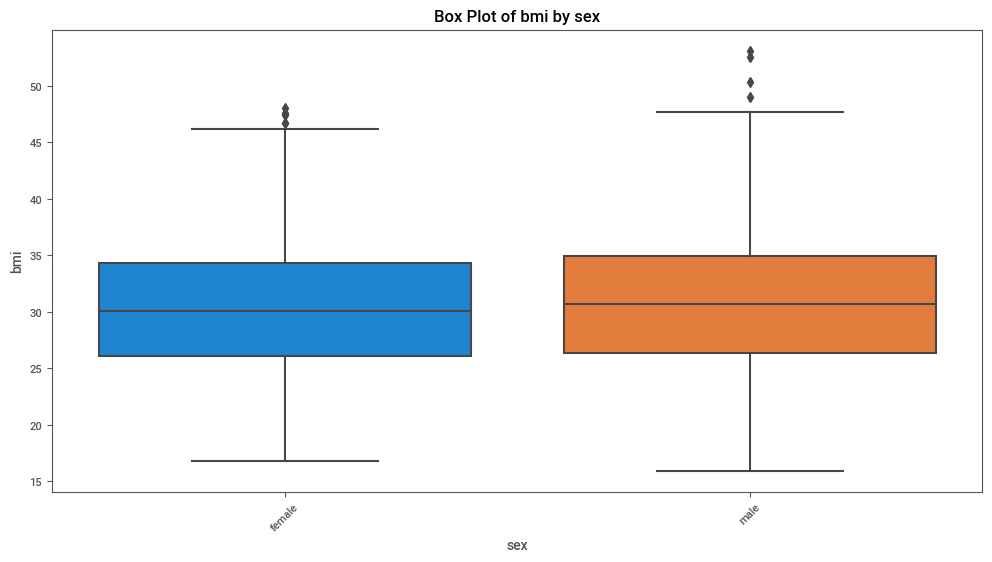

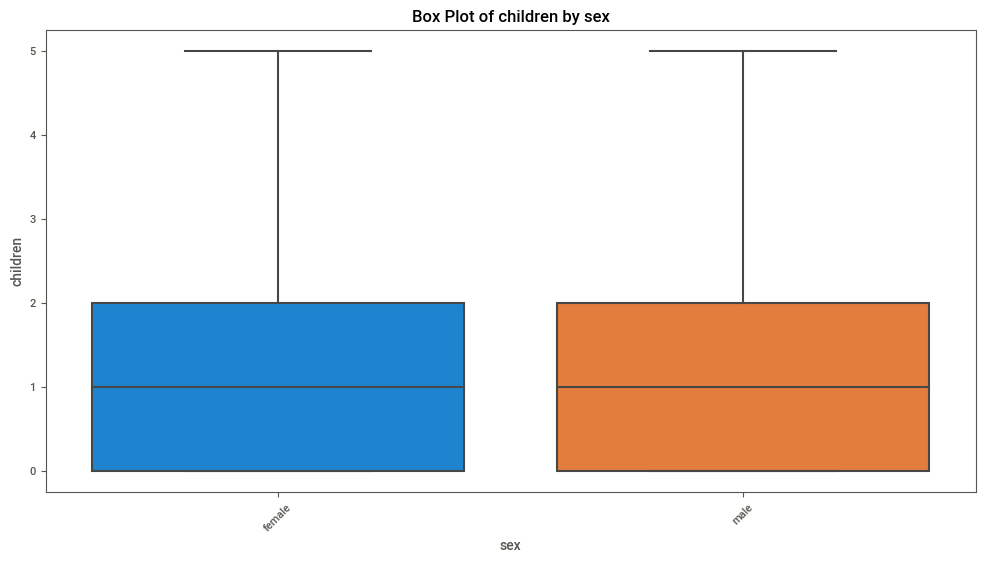

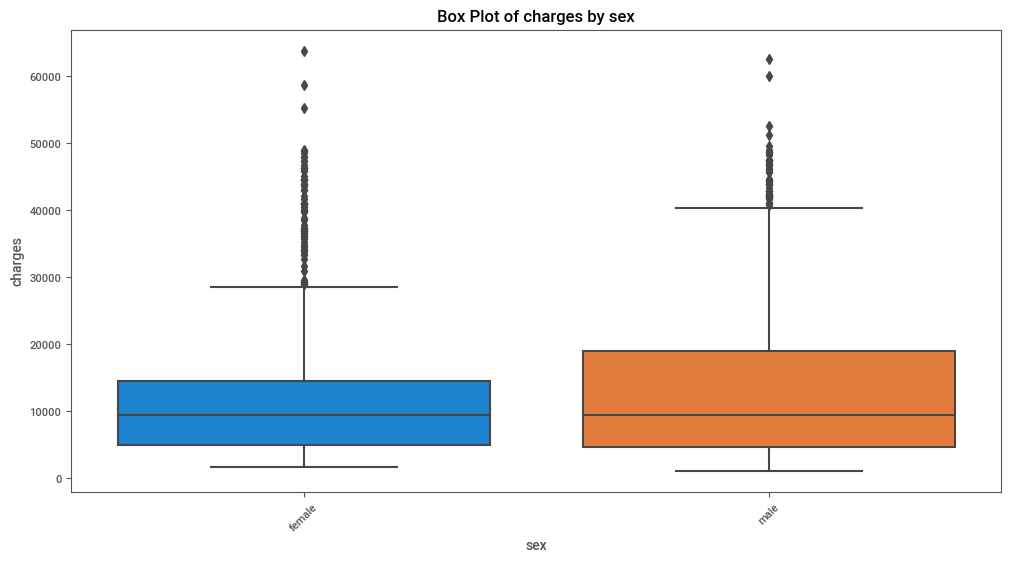

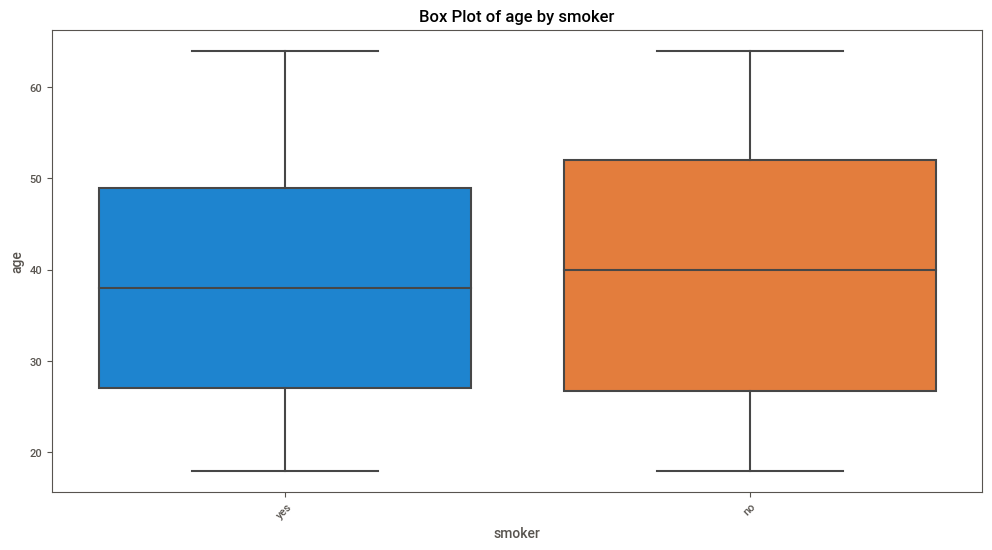

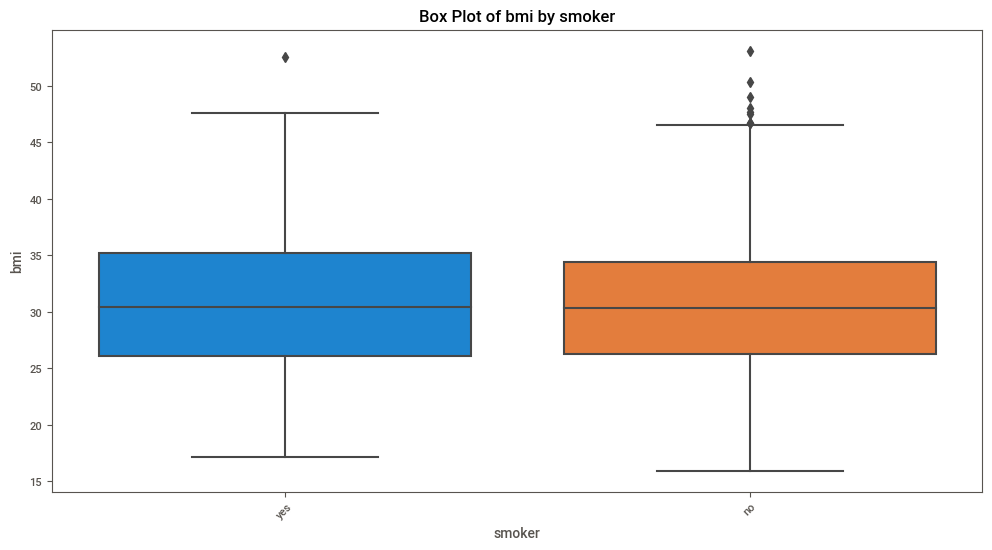

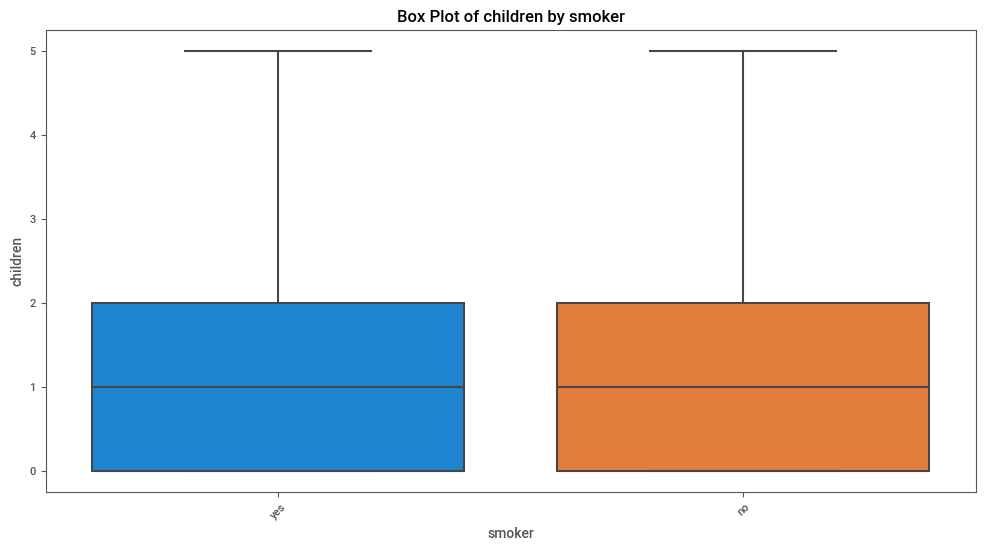

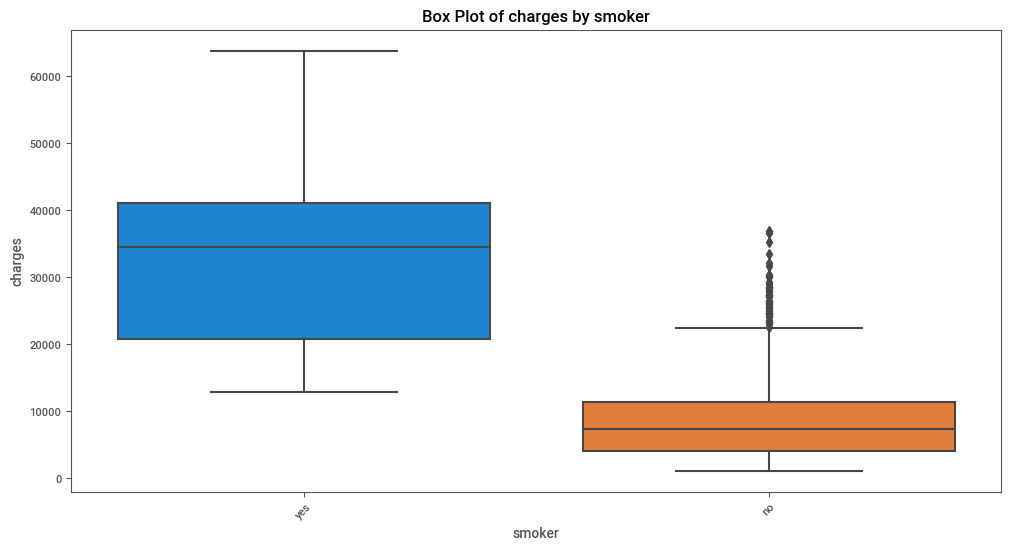

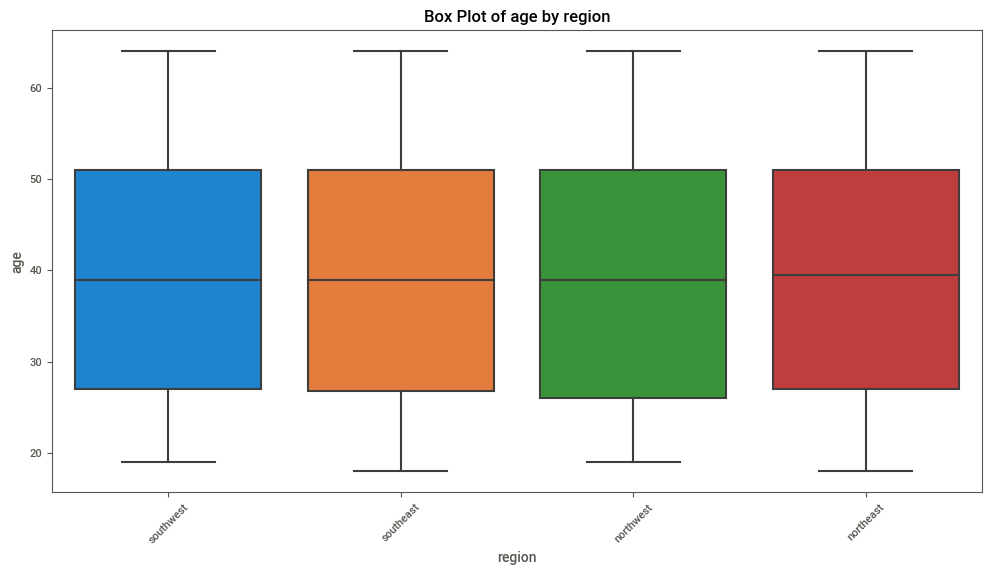

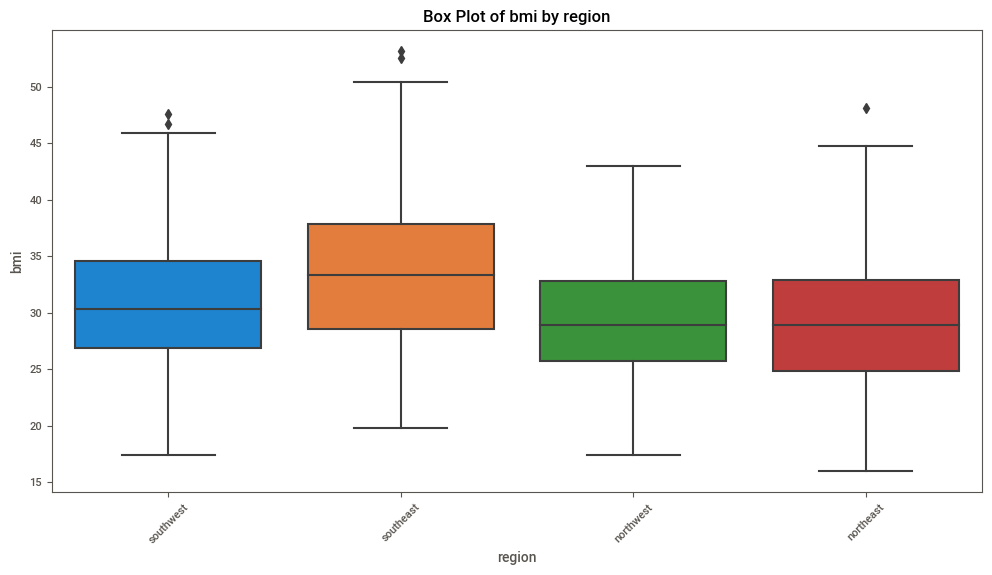

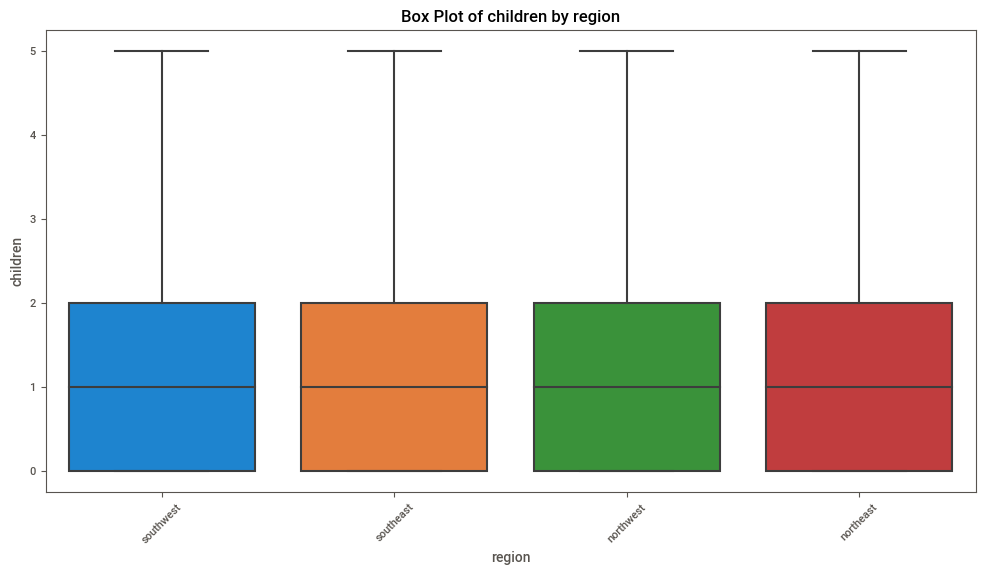

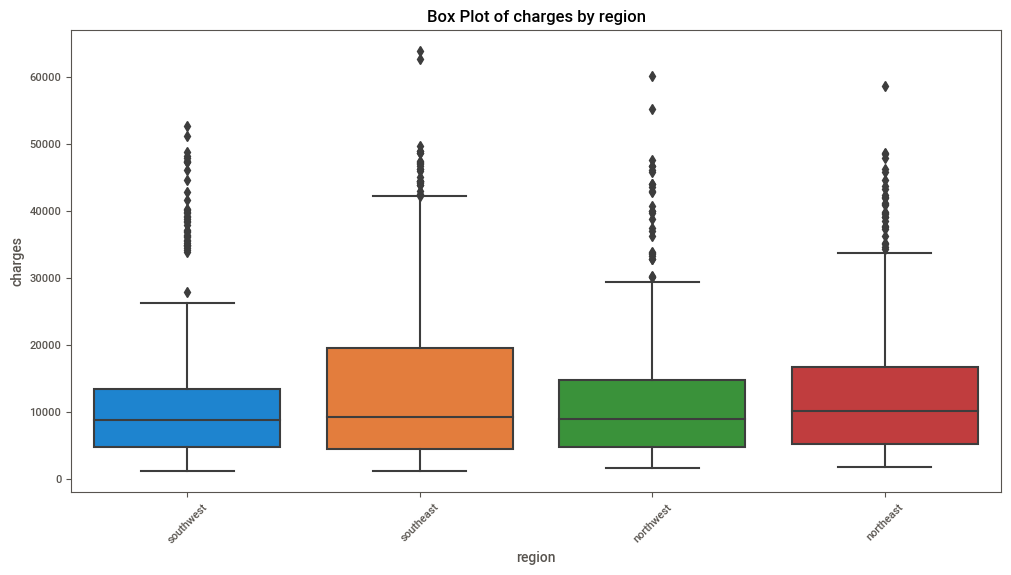

In [17]:
# Box plots for categorical vs. numerical
for cat_column in df.select_dtypes(include=['object']).columns:
    for num_column in df.select_dtypes(include=['float64', 'int64']).columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=df[cat_column], y=df[num_column])
        plt.title(f'Box Plot of {num_column} by {cat_column}')
        plt.xticks(rotation=45)
        plt.show()


#### 2. Categorical vs. Categorical: Crosstabs and stacked bar plots.

Crosstab of sex and smoker
smoker   no  yes
sex             
female  547  115
male    517  159


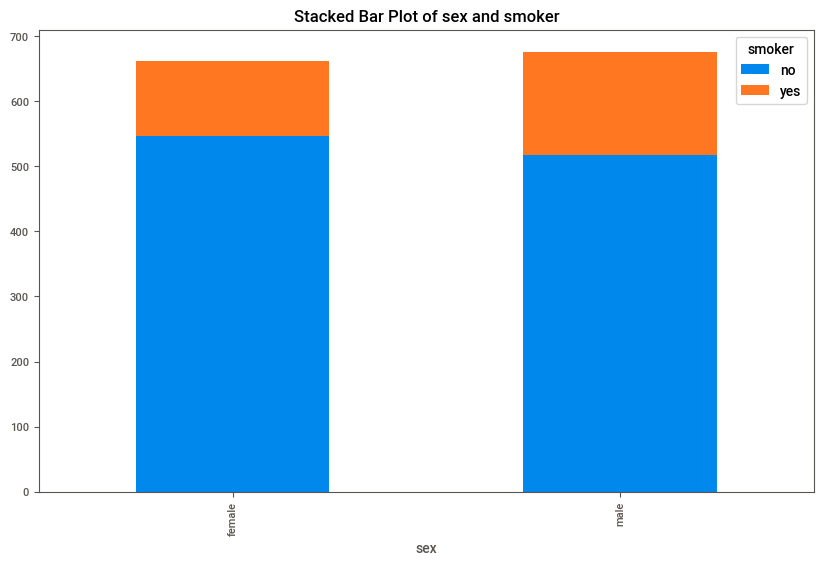

Crosstab of sex and region
region  northeast  northwest  southeast  southwest
sex                                               
female        161        164        175        162
male          163        161        189        163


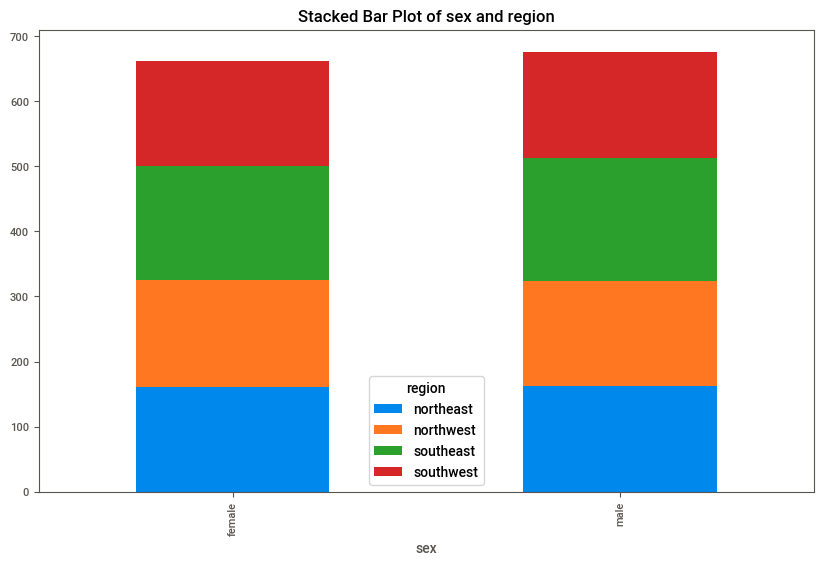

Crosstab of smoker and sex
sex     female  male
smoker              
no         547   517
yes        115   159


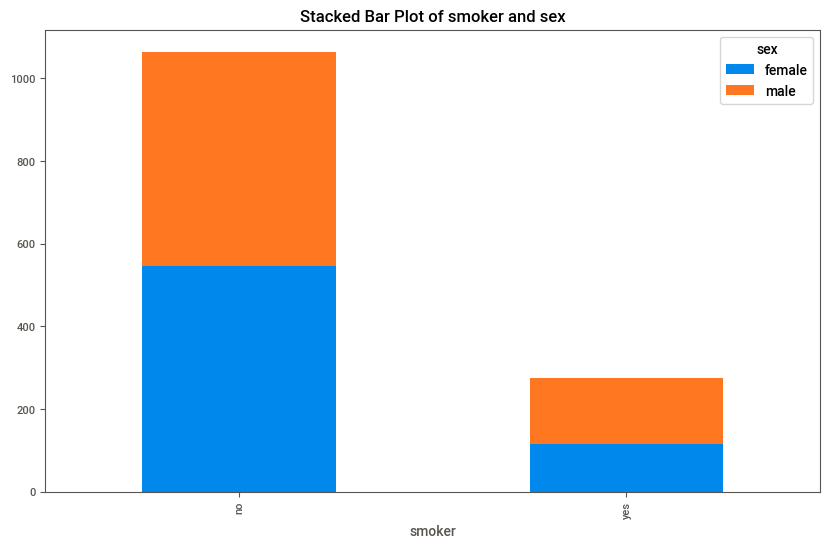

Crosstab of smoker and region
region  northeast  northwest  southeast  southwest
smoker                                            
no            257        267        273        267
yes            67         58         91         58


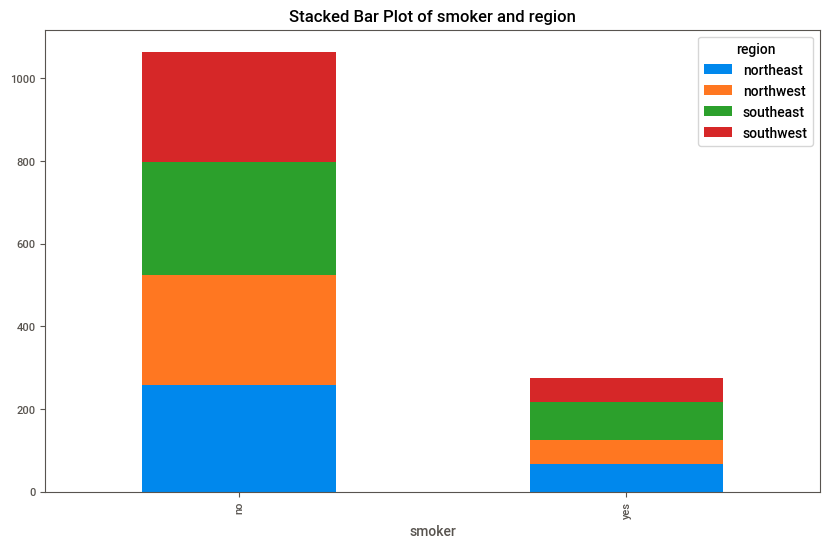

Crosstab of region and sex
sex        female  male
region                 
northeast     161   163
northwest     164   161
southeast     175   189
southwest     162   163


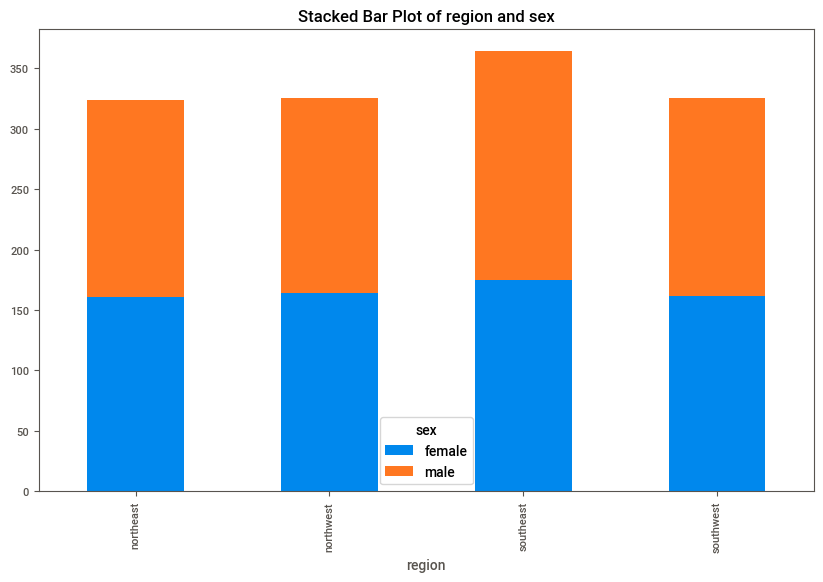

Crosstab of region and smoker
smoker      no  yes
region             
northeast  257   67
northwest  267   58
southeast  273   91
southwest  267   58


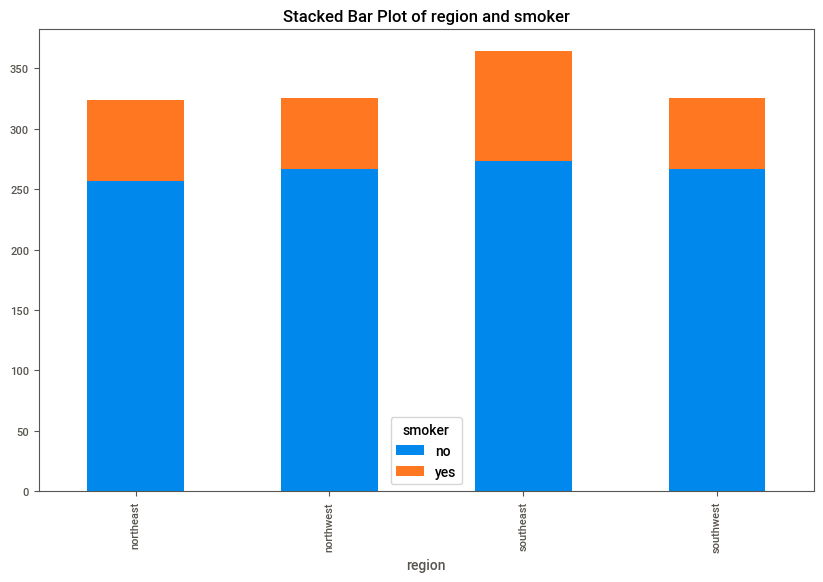

In [18]:
# Crosstabs
for cat_column1 in df.select_dtypes(include=['object']).columns:
    for cat_column2 in df.select_dtypes(include=['object']).columns:
        if cat_column1 != cat_column2:
            crosstab = pd.crosstab(df[cat_column1], df[cat_column2])
            print(f'Crosstab of {cat_column1} and {cat_column2}')
            print(crosstab)
            crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
            plt.title(f'Stacked Bar Plot of {cat_column1} and {cat_column2}')
            plt.show()


### PreProcessing

#### Loading Data

In [21]:
pd.set_option('display.max_columns', None)

In [22]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [23]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [25]:
# Checking for Missing Values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [26]:
#checking for duplicated value
data.duplicated().sum()

1

In [27]:
# drop duplicate value
df = data.drop_duplicates()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [28]:
#checking for duplicated value
df.duplicated().sum()

0

In [29]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [30]:
# Conversion of  Categorical variables
df.describe(include='O').T

,count,unique,top,freq
sex,1337,2,male,675
smoker,1337,2,no,1063
region,1337,4,southeast,364


In [31]:
# Using Label Incoder
from sklearn.preprocessing import LabelEncoder

#### Sex

In [32]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [33]:
df.sex.value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [34]:
lb=LabelEncoder()
df.sex=lb.fit_transform(df['sex'])

#### Smoker

In [35]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [36]:
df.smoker.value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [37]:
lb=LabelEncoder()
df.smoker=lb.fit_transform(df['smoker'])

In [38]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


#### Region

In [39]:
# Using Manual Incoder

In [40]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [41]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [42]:
df.region=data.region.map({'southeast':3,'southwest':2,'northwest':1,'northeast':0})

In [43]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,3,1629.83350
1336,21,0,25.800,0,0,2,2007.94500


#### Handling Outliers

In [44]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

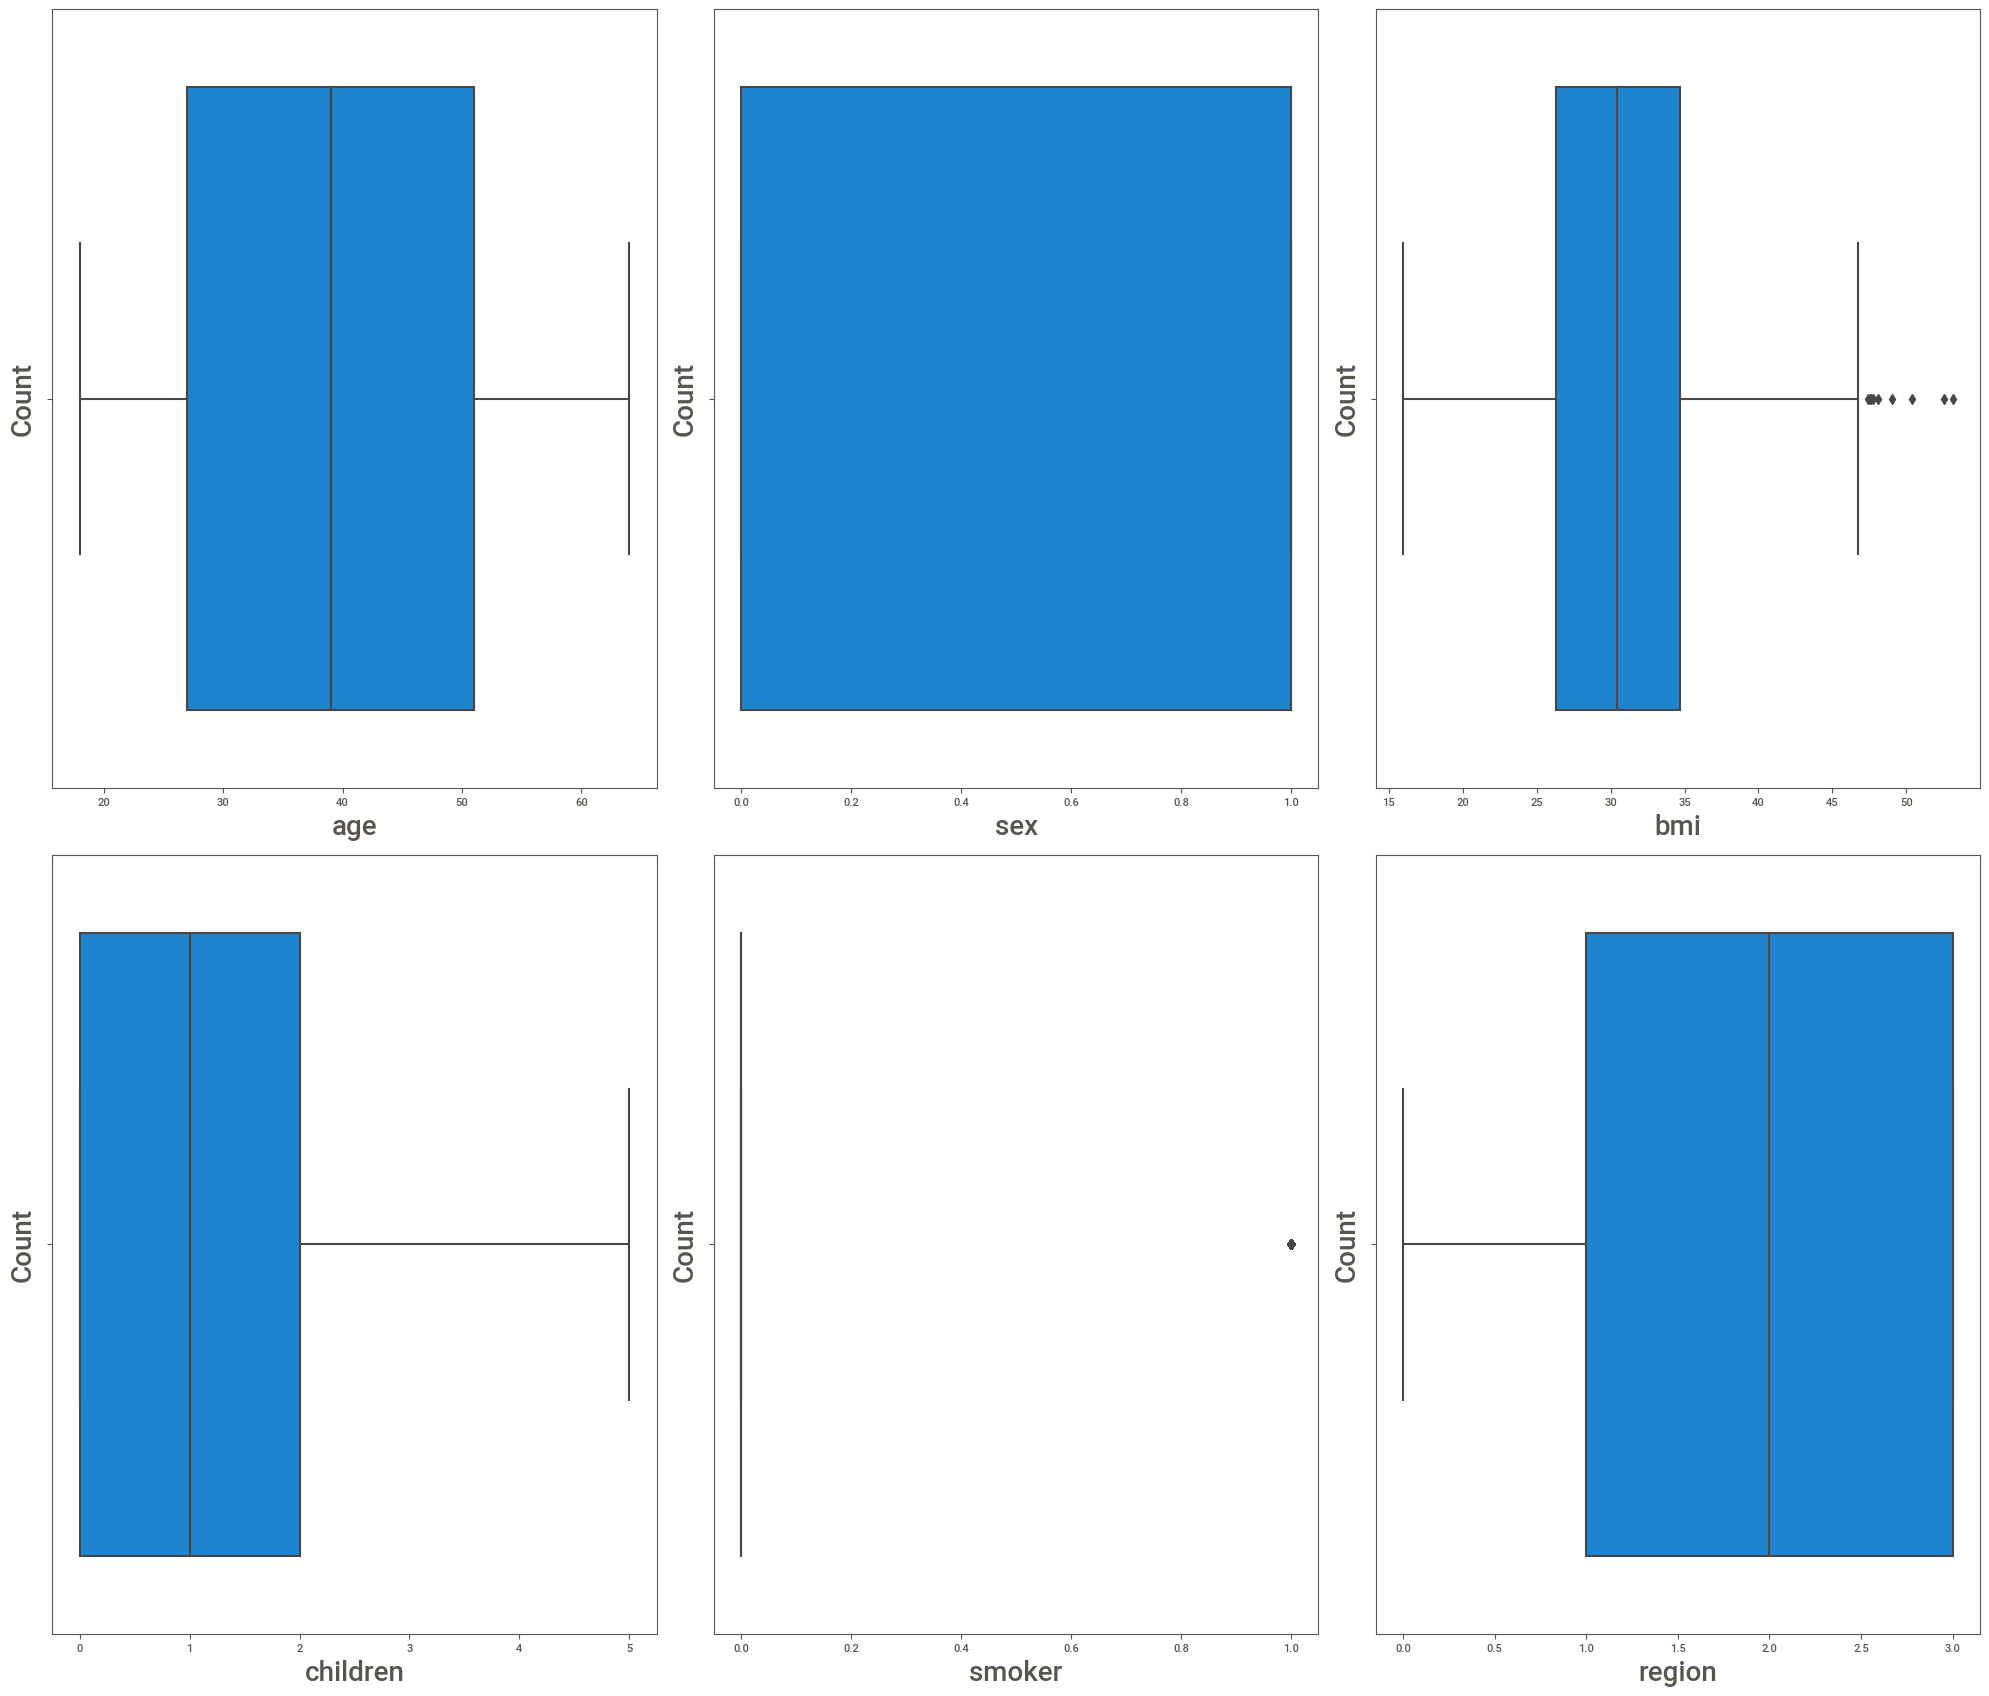

In [45]:
df2=df.iloc[:,:-1]
plt.figure(figsize=(20,25),facecolor='white')
pltno=1
for column in df2:
    if pltno<=6:
        ax=plt.subplot(3,3,pltno)
        sns.boxplot(x=df2[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    pltno+=1
plt.tight_layout()

In [46]:
data_dist=df[['bmi','smoker']]

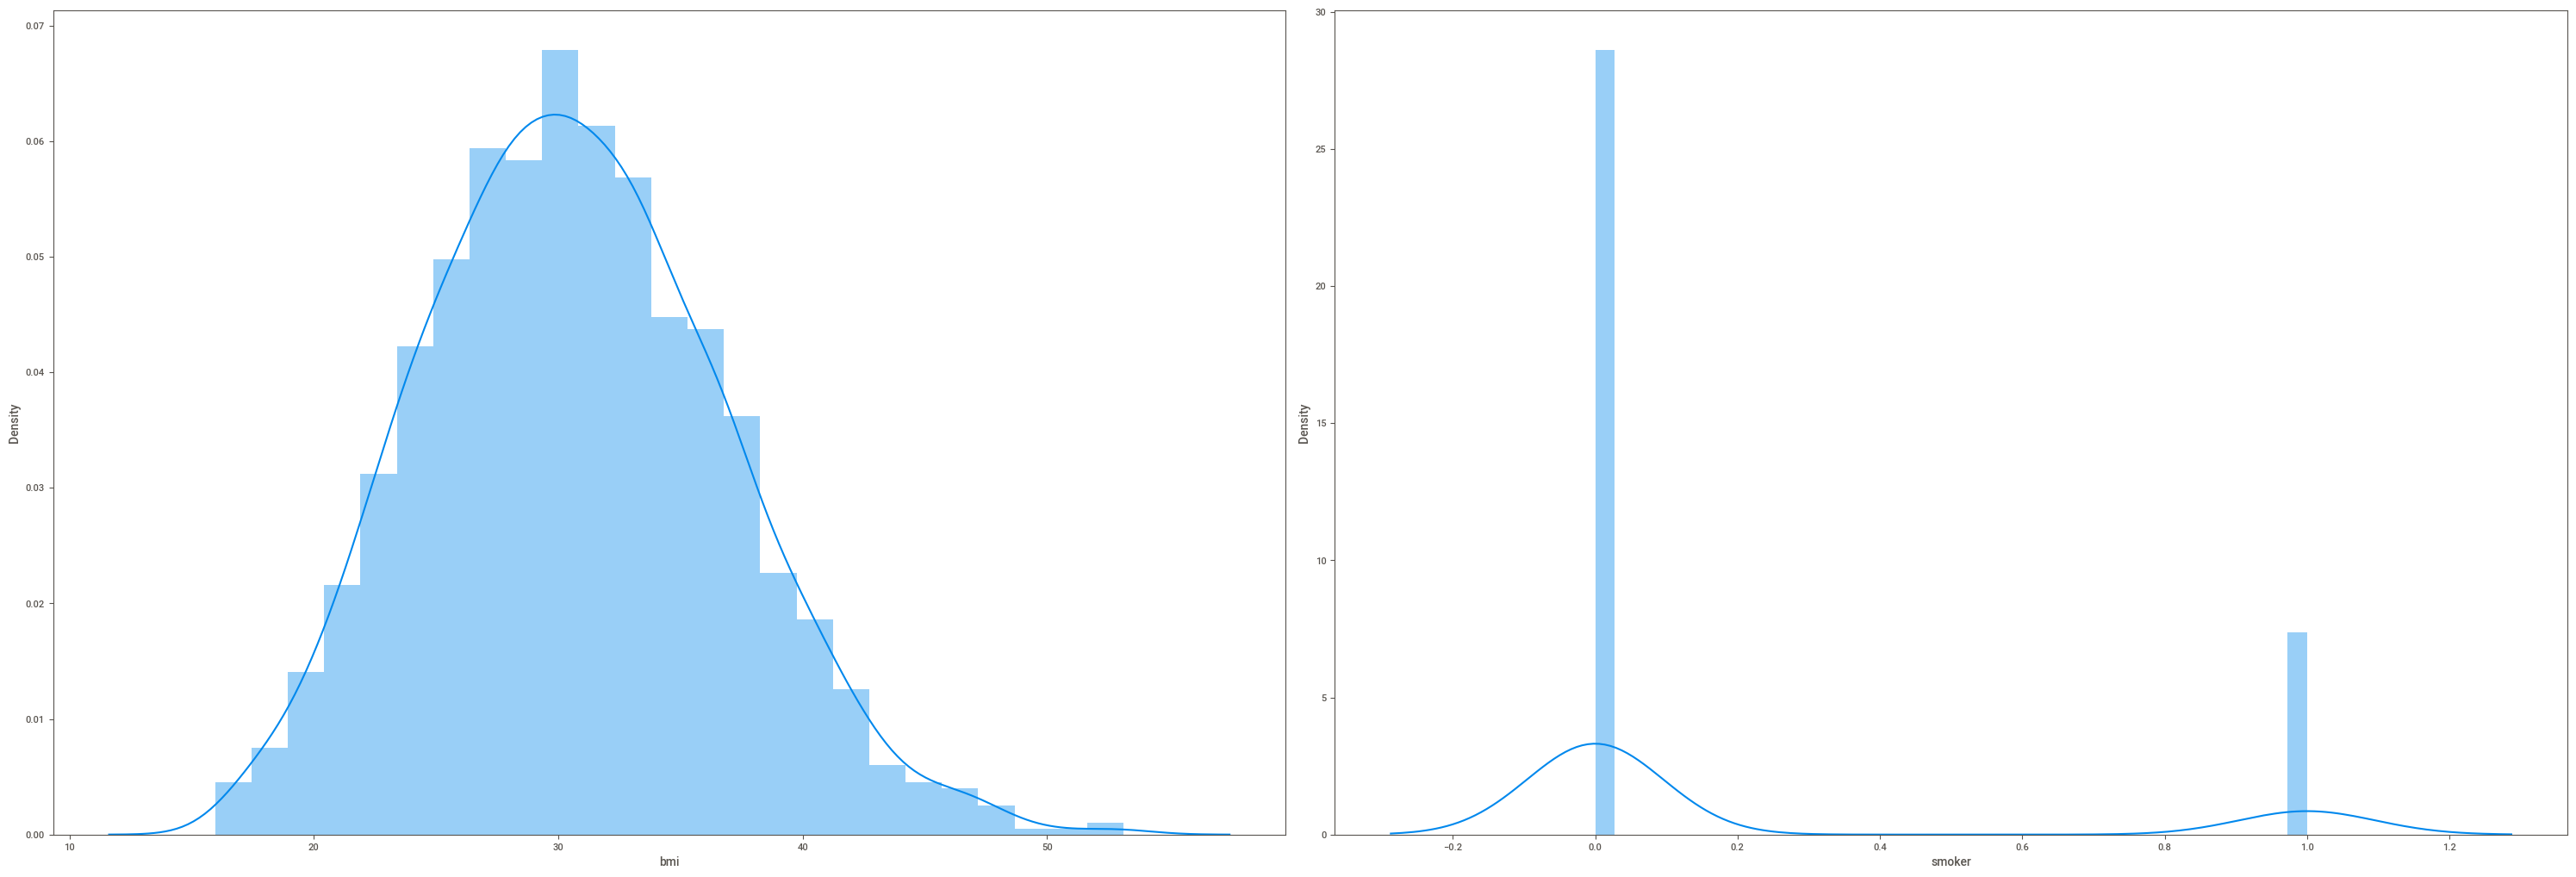

In [47]:
plt.figure(figsize=(30,20),facecolor='white')

plotnumber=1

for column in data_dist:
    if plotnumber<=3 :
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[column])
       
    plotnumber+=1
plt.tight_layout()

#### Using IQR to remove the outliers
1.) BMI

In [48]:
IQR = stats.iqr(df.bmi, interpolation = 'midpoint') 
IQR

8.410000000000004

In [49]:
## min and max limit calculation

Q1 = df.bmi.quantile(0.25) 
Q3 =df.bmi.quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR
max_limit=Q3 +1.5*IQR

In [50]:
print('Q1 :',Q1)
print('Q3 :',Q3)
print('min_limit :',min_limit)
print('max_limit :',max_limit)

Q1 : 26.29
Q3 : 34.7
min_limit : 13.674999999999994
max_limit : 47.31500000000001


In [51]:
len(df.loc[df['bmi']>max_limit])/len(data)*100

0.672645739910314

In [52]:
len(df.loc[df['bmi']<min_limit])/len(data)*100

0.0

In [53]:
df.loc[df['bmi'] > max_limit,'bmi']=np.median(df.bmi)

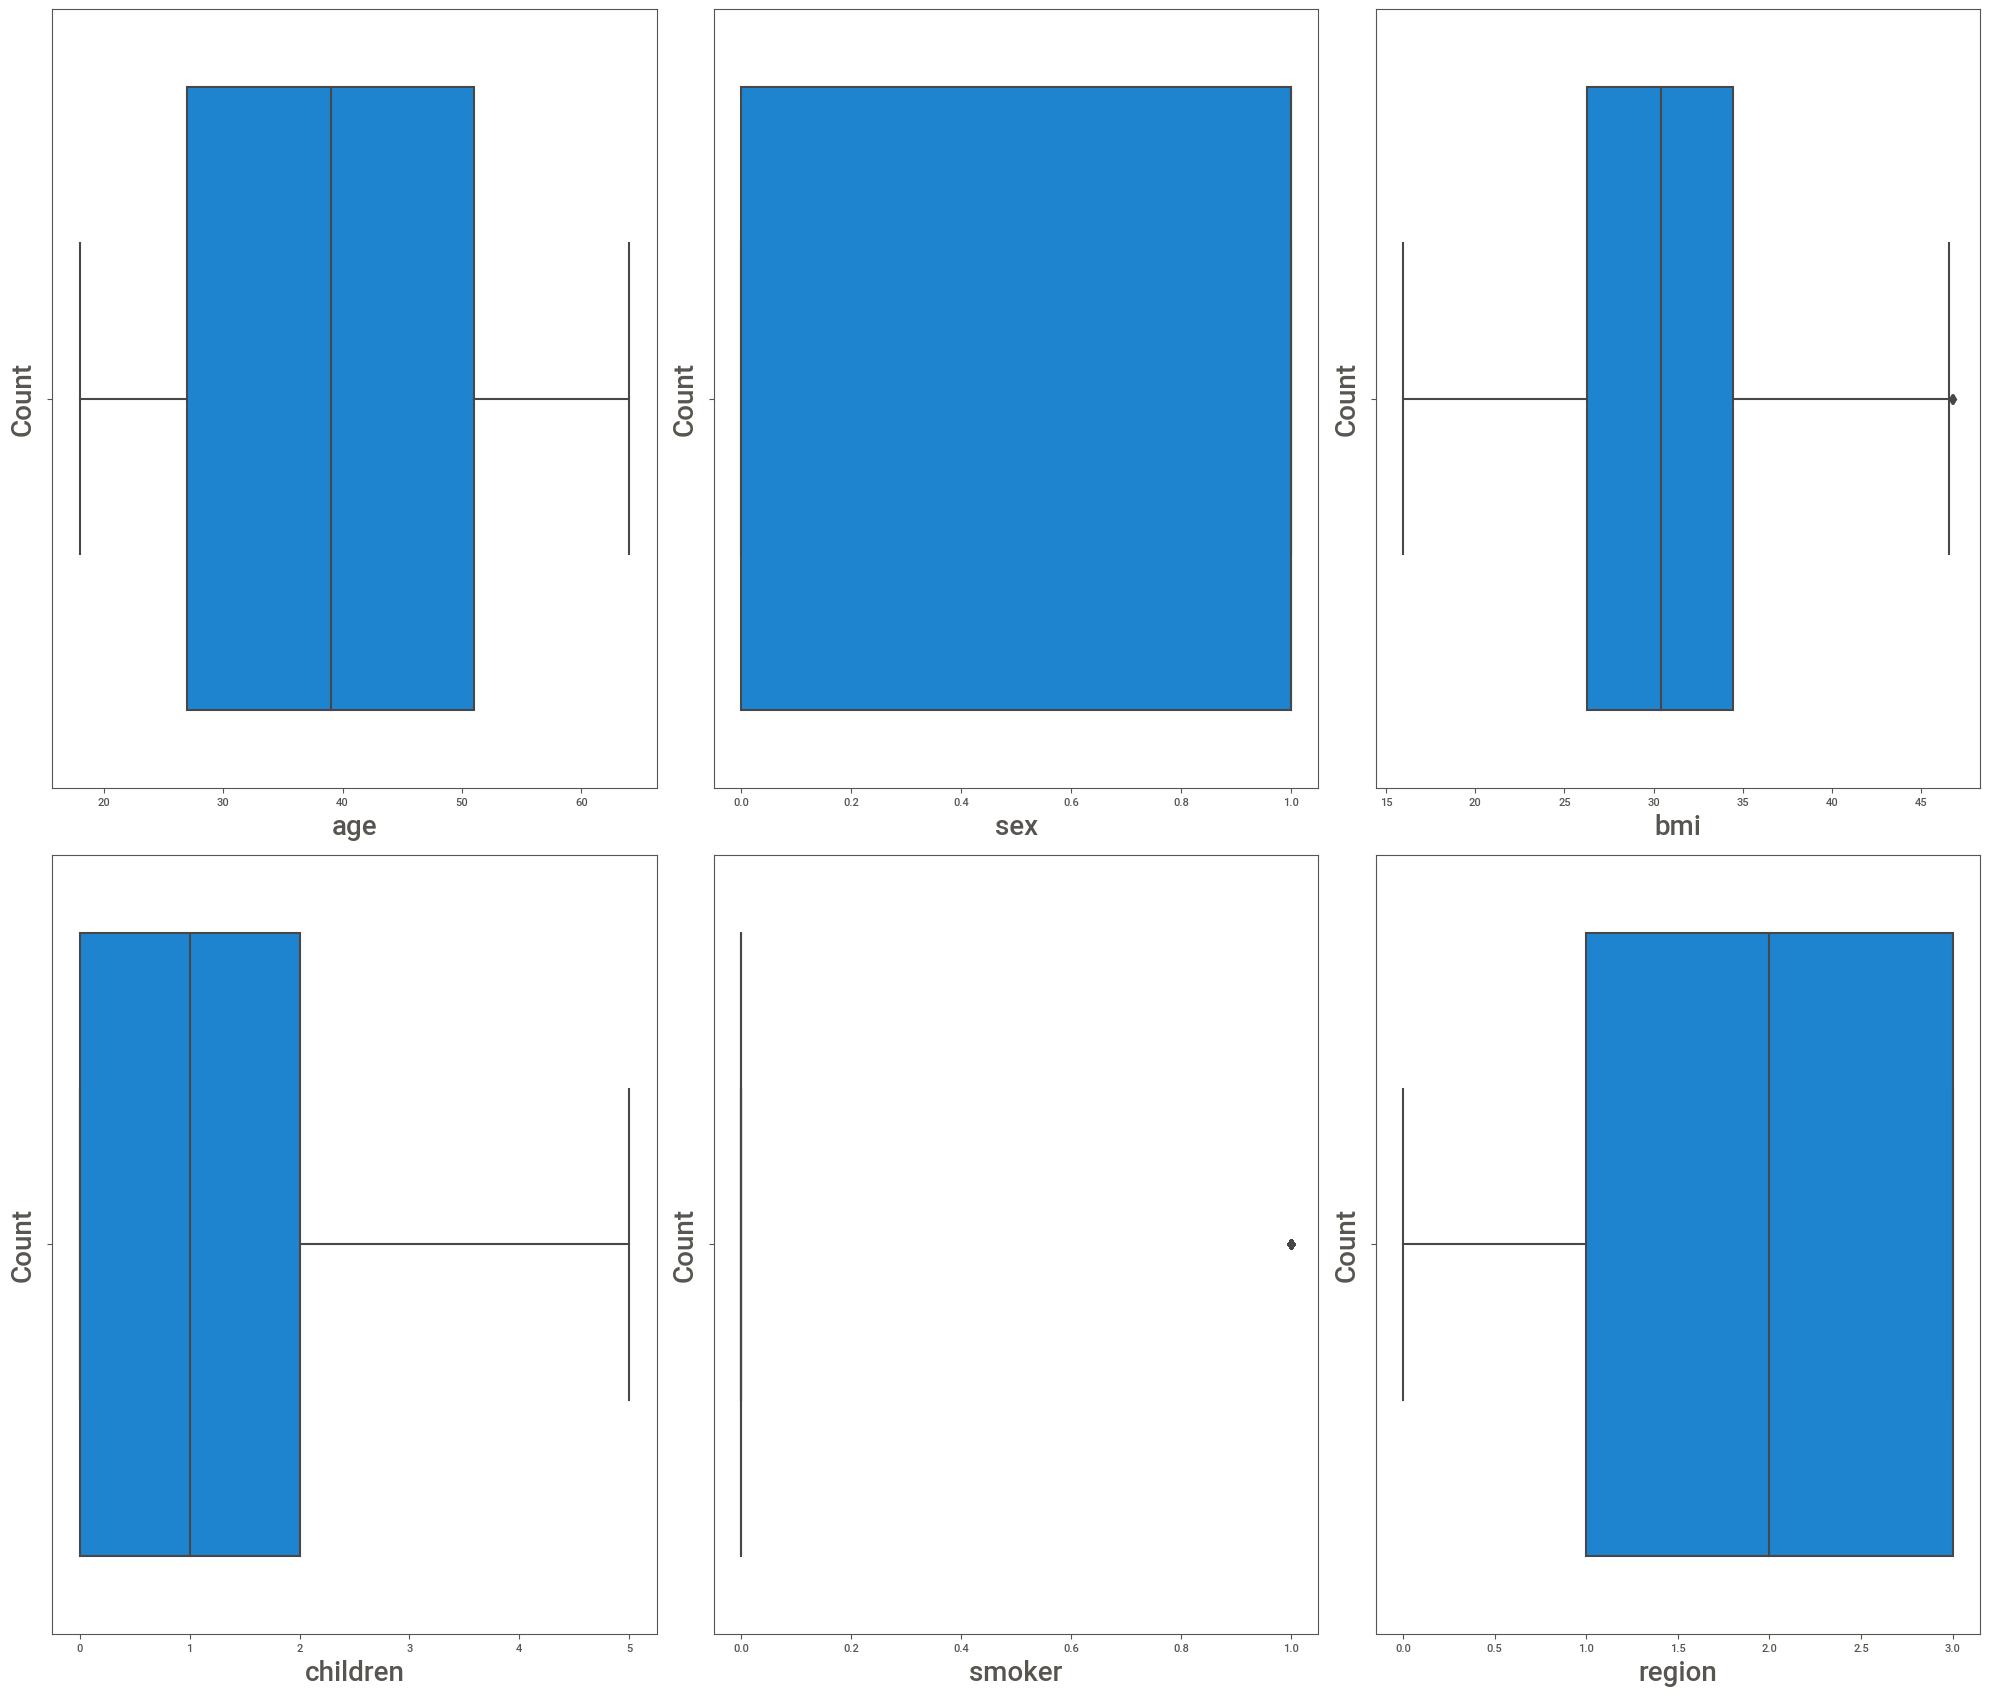

In [54]:
df2=df.iloc[:,:-1]
plt.figure(figsize=(20,25),facecolor='white')
pltno=1
for column in df2:
    if pltno<=6:
        ax=plt.subplot(3,3,pltno)
        sns.boxplot(x=df2[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    pltno+=1
plt.tight_layout()

In [55]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,3,1629.83350
1336,21,0,25.800,0,0,2,2007.94500


### Feature Selection

In [56]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.114375,0.041536,-0.025587,-0.006833,0.298308
sex,-0.019814,1.000000,0.039781,0.017848,0.076596,0.013179,0.058044
bmi,0.114375,0.039781,1.000000,0.017369,-0.002903,0.251751,0.190713
children,0.041536,0.017848,0.017369,1.000000,0.007331,-0.001533,0.067389
smoker,-0.025587,0.076596,-0.002903,0.007331,1.000000,0.038697,0.787234
region,-0.006833,0.013179,0.251751,-0.001533,0.038697,1.000000,0.039144
charges,0.298308,0.058044,0.190713,0.067389,0.787234,0.039144,1.000000


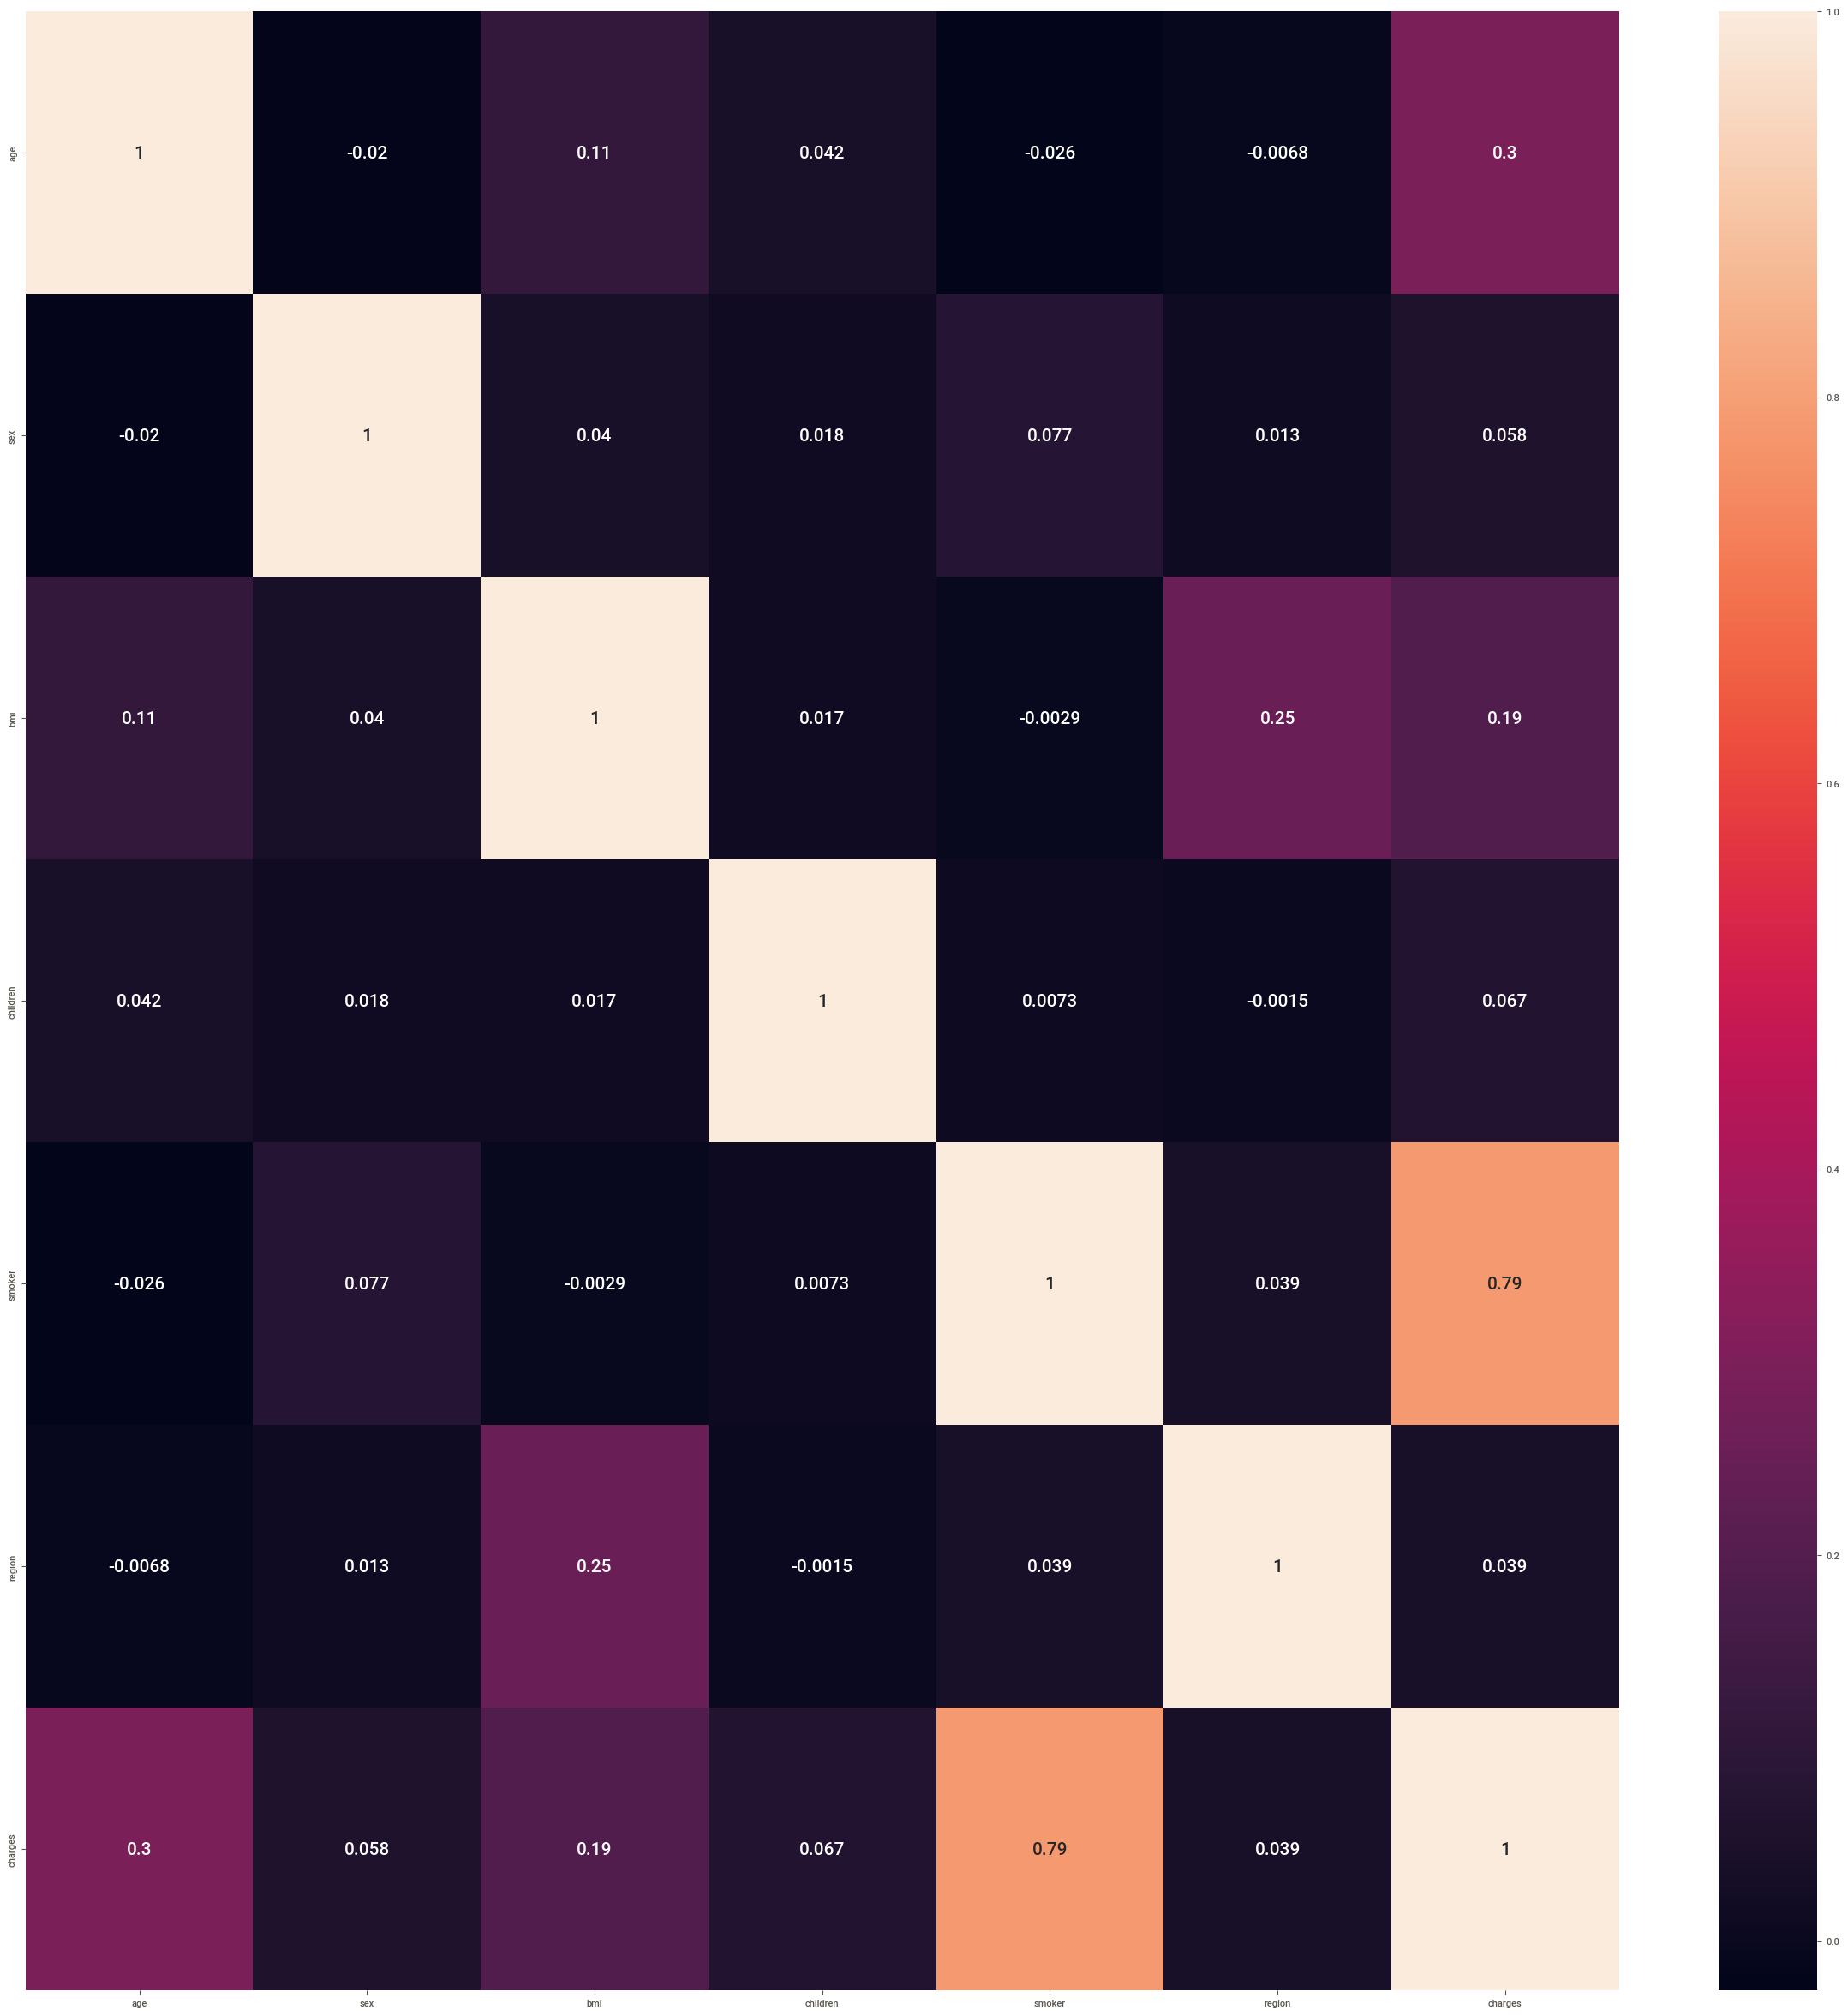

In [57]:
# check correlation with heat map
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,annot_kws={"size":15})
plt.show()

### Smoker, BMI and Age are most important factor that determnines - Charges
* Also we see that Sex, Children and Region do not affect the Charges. We might drop these 3 columns as they have less correlation

In [58]:
df.drop(columns=['sex','children','region'], inplace=True)

In [59]:
df

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,0,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


### Save Pre-Process Data

In [60]:
df.to_csv('datasets_13720_18513_insurance_preprocessed.csv')
df=pd.read_csv('datasets_13720_18513_insurance_preprocessed.csv')
df.head()

,Unnamed: 0,age,bmi,smoker,charges
0,0,19,27.900,1,16884.92400
1,1,18,33.770,0,1725.55230
2,2,28,33.000,0,4449.46200
3,3,33,22.705,0,21984.47061
4,4,32,28.880,0,3866.85520


In [61]:
df.smoker.value_counts()

smoker
0    1063
1     274
Name: count, dtype: int64

In [62]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

### Model Creation

In [63]:
df.head()

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [64]:
###Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[['age','bmi','charges']]=sc.fit_transform(df[['age','bmi','charges']])

In [65]:
df

,age,bmi,smoker,charges
0,-1.440418,-0.446845,1,0.297857
1,-1.511647,0.548071,0,-0.954381
2,-0.799350,0.417562,0,-0.729373
3,-0.443201,-1.327354,0,0.719104
4,-0.514431,-0.280743,0,-0.777499
...,...,...,...,...
1332,0.767704,0.073494,0,-0.221263
1333,-1.511647,0.234511,0,-0.914695
1334,-1.511647,1.070105,0,-0.962287
1335,-1.297958,-0.802777,0,-0.931054


### Train Test Split

In [66]:
#Defining dependent and independent valiable
x=df.iloc[:,:-1]
y=df['charges']

In [67]:
x

,age,bmi,smoker
0,-1.440418,-0.446845,1
1,-1.511647,0.548071,0
2,-0.799350,0.417562,0
3,-0.443201,-1.327354,0
4,-0.514431,-0.280743,0
...,...,...,...
1332,0.767704,0.073494,0
1333,-1.511647,0.234511,0
1334,-1.511647,1.070105,0
1335,-1.297958,-0.802777,0


In [68]:
y

0       0.297857
1      -0.954381
2      -0.729373
3       0.719104
4      -0.777499
          ...   
1332   -0.221263
1333   -0.914695
1334   -0.962287
1335   -0.931054
1336    1.310298
Name: charges, Length: 1337, dtype: float64

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)


In [70]:
x_train.shape

(1002, 3)

In [71]:
x_test.shape

(335, 3)

In [72]:
y_test.shape

(335,)

### Linear Regg

In [73]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_pred   ## pred Value

array([-0.71125817, -0.74427269, -0.07766687, -0.1944415 ,  1.69115508,
       -0.59484934, -0.15745355, -0.80810284,  1.54778179,  0.16512723,
       -0.22311678, -0.83721078, -0.72012789,  1.4895387 ,  1.64314033,
        1.44073074, -0.64283902, -0.42419282, -0.55957221, -0.58818374,
        1.19762624, -0.34795742,  1.28469194, -0.39654069, -0.49590824,
       -0.76357347,  1.52865029, -0.37131736, -0.53574093, -0.53214476,
       -0.44241196, -0.21352596, -0.13454823, -0.42752563, -0.52910876,
       -0.1839665 ,  0.01859567, -0.39925793,  0.06430076, -0.10090766,
       -0.98250286,  1.42038173, -0.54733101, -0.88050904, -0.14959337,
        0.15010192,  0.02694702,  1.92891392,  1.73402378, -1.00468708,
       -0.13568528,  0.02527799, -0.4689772 ,  2.05353823,  0.02351179,
       -0.34780795, -0.72620301, -0.59379588, -0.82232134, -0.10333336,
       -0.53882708,  1.72807617, -0.20681331, -0.15845473, -0.40755077,
        0.05534222, -0.75625363, -0.77372971, -1.12024206,  0.18

In [74]:
y_test   ## Actual Value

1107   -0.857028
125    -0.817269
233    -0.078086
334     0.484515
952     2.124549
          ...   
857     0.407989
881    -0.883316
754    -0.681312
679    -0.883364
544    -0.251748
Name: charges, Length: 335, dtype: float64

In [75]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2=r2_score(y_test,y_pred)
print('R2_Score:',r2)

R2_Score: 0.7137508308177298


In [76]:
import math
print(mean_squared_error(y_test,y_pred))
print(math.sqrt(mean_squared_error(y_test,y_pred))) #root mean squared error
print(mean_absolute_error(y_test,y_pred))

0.25645420771666566
0.5064130801200396
0.3411199729299844


In [77]:
from sklearn.model_selection import cross_val_score
mse=cross_val_score(lr,x_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [78]:
np.mean(mse)        ## mean is low here, lower mean indicates the scores are good. 

-0.2566050870648292

### Random Forest

In [79]:
from sklearn.ensemble import RandomForestRegressor
rlf= RandomForestRegressor(random_state=15)
rlf.fit(x_train,y_train)


RandomForestRegressor(random_state=15)

In [80]:
y_pred_rfr=rlf.predict(x_test)
y_pred_rfr

array([-0.70903499, -0.7940308 , -0.03665081, -0.44227685,  2.81320112,
       -0.5505256 , -0.23793515, -0.42225307,  2.32654908,  0.05352851,
       -0.39380327, -0.5728392 , -0.65404669,  2.40776546,  2.10711033,
        0.61299745, -0.76227098, -0.34288516, -0.77544346, -0.70543513,
        0.4071793 , -0.57003579,  1.812376  ,  0.27486391, -0.84002974,
       -0.63118353,  2.2076774 , -0.51958888, -0.66310092, -0.65861648,
       -0.56490392, -0.50932763, -0.71783872, -0.32564558, -0.53442968,
        0.02147984, -0.05003233, -0.08337622,  0.35737583,  0.15150304,
       -0.82267729,  1.12101128, -0.5183146 , -0.9260235 ,  0.01935516,
        0.115636  ,  0.08802991,  2.65915575,  2.27738458, -0.95669284,
       -0.37988768, -0.23560093, -0.59173898,  2.95477293, -0.23131939,
       -0.15166726, -0.73692617, -0.49619154, -0.70075841, -0.56968903,
       -0.49141703,  0.9091518 , -0.42991245, -0.04027445, -0.38940549,
        0.18888585, -0.70768306, -0.91443916, -0.96405304,  0.60

In [81]:
y_test

1107   -0.857028
125    -0.817269
233    -0.078086
334     0.484515
952     2.124549
          ...   
857     0.407989
881    -0.883316
754    -0.681312
679    -0.883364
544    -0.251748
Name: charges, Length: 335, dtype: float64

In [82]:
r2_rfr=r2_score(y_pred_rfr,y_test)
r2_rfr

0.7508592050052763

In [83]:
mean_squared_error(y_pred_rfr,y_test)

0.20709470150868753

In [84]:
mean_absolute_error(y_pred_rfr,y_test)

0.2553729475327687

In [85]:
y_train_predict=rlf.predict(x_train)
r2_rfr=r2_score(y_train_predict,y_train)
r2_rfr

0.9711816869746284

In [86]:
from sklearn.model_selection import RandomizedSearchCV
param_distributions = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_depth': [None] + [int(x) for x in np.linspace(10, 110, num=11)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a base model
rf = RandomForestRegressor()

# Instantiate the random search model
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, 
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search to the data
random_search.fit(x_train, y_train)

# Best parameters
print("Best parameters found: ", random_search.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}


In [87]:
rf_clf2=RandomForestRegressor(n_estimators=600,min_samples_split=5,min_samples_leaf= 2, max_features='log2', max_depth= 10)
rf_clf2.fit(x_train,y_train)
y_predict1=rf_clf2.predict(x_test)
y_predict1

array([-5.29951031e-01, -6.91528171e-01,  8.08430043e-03, -4.05146436e-01,
        1.89498285e+00, -6.40330281e-01, -3.75402950e-01, -7.18614998e-01,
        1.98907128e+00,  6.02918746e-02, -3.61198192e-01, -5.83736534e-01,
       -6.53672572e-01,  2.17815455e+00,  1.88599014e+00,  6.00494229e-01,
       -7.75158851e-01, -2.37438929e-01, -6.83232815e-01, -6.32222122e-01,
        4.38913638e-01, -5.19725925e-01,  1.81970221e+00,  2.07943390e-02,
       -7.27447384e-01, -5.95783141e-01,  2.02572559e+00, -4.42763155e-01,
       -5.88256951e-01, -6.52464270e-01, -5.55151928e-01, -4.75941100e-01,
       -6.00452109e-01, -1.58057695e-01, -6.13149325e-01,  7.66929989e-02,
       -3.17705195e-02, -6.31002866e-02,  4.10081614e-01,  2.48184470e-01,
       -7.75664911e-01,  8.18930075e-01, -4.90517944e-01, -8.54336911e-01,
       -2.26113888e-02,  2.36945460e-01,  2.63681801e-01,  2.53176565e+00,
        2.14467891e+00, -8.67937739e-01, -3.87455688e-01, -1.53357933e-01,
       -4.98459121e-01,  

In [88]:
r2=r2_score(y_predict1,y_test)
r2

0.750777036789573

In [89]:
mean_squared_error(y_predict1,y_test)

0.17384637447851814

In [90]:
mean_absolute_error(y_predict1,y_test)

0.24470551491148368

### Decision Tree

In [91]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)


DecisionTreeRegressor()

In [92]:
y_pred=dt.predict(x_test)
y_pred

array([-0.76798904, -0.85712546, -0.08634629, -0.49012707,  4.17082571,
       -0.73754606,  0.51360359, -0.8937348 ,  2.53305679, -0.15803704,
       -0.42647656, -0.70704652, -0.99268391,  2.0843269 ,  1.98177489,
        0.6190824 , -0.72795506, -0.32853823, -0.8031006 , -0.67162425,
        0.45323237, -0.58591559,  1.78009544,  0.93541104, -0.80775207,
       -0.65810867,  1.89318516, -0.58160602, -0.83489555, -0.65685057,
       -0.57367219, -0.5054417 , -0.76698118, -0.345623  , -0.49854557,
       -0.05368949, -0.11866165,  0.93541104, -0.05294362, -0.01959391,
       -0.90673846,  1.79998011, -0.51230954, -0.91490214, -0.18144516,
        0.02944998,  0.06014462,  2.55443306,  2.29270527, -0.95575403,
       -0.43416982, -0.30106019, -0.65291546,  2.94122869, -0.30106019,
       -0.20545155, -0.81669381, -0.55226393, -0.75087858, -0.4649287 ,
       -0.68157036,  0.88290201, -0.45823076,  0.62776885, -0.81016436,
        0.06014462, -0.6895417 , -0.91010305, -0.99430288,  0.70

In [93]:
y_test

1107   -0.857028
125    -0.817269
233    -0.078086
334     0.484515
952     2.124549
          ...   
857     0.407989
881    -0.883316
754    -0.681312
679    -0.883364
544    -0.251748
Name: charges, Length: 335, dtype: float64

In [94]:
r2_score(y_test,y_pred)

0.6249274039406292

In [95]:
y_train_pred=dt.predict(x_train)
y_train_pred

array([-0.32225934,  0.83614129,  2.58605438, ..., -0.28235127,
       -0.91488032, -0.56040925])

In [96]:
r2_score(y_train_pred,y_train)

0.9961979240236974

In [97]:
# Define the parameter grid
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20,25, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['friedman_mse', 'mse', 'mae'],
    'splitter': ['best', 'random']
}

# Create a base model
dt = DecisionTreeRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 1134 candidates, totalling 3402 fits
Best parameters found:  {'criterion': 'friedman_mse', 'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}


In [98]:
dt1=DecisionTreeRegressor(criterion='friedman_mse',max_depth=10,max_features='sqrt',min_samples_leaf=4,min_samples_split=2,splitter='best')
dt1.fit(x_train,y_train)
y_hat1=dt1.predict(x_test)
y_hat1

array([-5.71090646e-01, -7.82064725e-01, -1.16717844e-02, -2.77113367e-01,
        2.32258725e+00, -5.71090646e-01, -7.15258124e-01, -6.63250120e-01,
        2.14483625e+00, -1.10550001e-01, -3.40193940e-01, -8.12942184e-01,
       -2.46576695e-01,  2.24332589e+00,  2.14483625e+00,  5.61737538e-01,
       -6.63250120e-01, -3.16841613e-01, -6.63250120e-01, -6.63250120e-01,
        4.64272463e-01, -6.63250120e-01,  1.83532235e+00,  3.86619179e-01,
       -8.54699399e-01, -3.29317610e-01,  2.06545693e+00, -6.63250120e-01,
       -6.63250120e-01, -6.63250120e-01, -2.46576695e-01, -2.77113367e-01,
       -7.15258124e-01, -3.37505322e-01, -5.70362670e-01,  4.71906567e-01,
       -1.05404865e-01,  3.86619179e-01,  1.52261441e-01,  3.18047553e-01,
       -7.82283792e-01,  1.00388846e+00, -5.46287695e-01, -5.71090646e-01,
       -1.46985695e-01,  5.02570483e-01, -1.16717844e-02,  2.72176820e+00,
        2.14483625e+00, -9.06567117e-01, -4.27486001e-01, -2.11562287e-01,
       -6.63250120e-01,  

In [99]:
r2_score(y_hat1,y_test) #After tuning the r2_score increased.

0.7424493223017715

In [100]:
mean_squared_error(y_hat1,y_test)

0.20570151073573567

### SVM

In [101]:
from sklearn.svm import SVR
sv=SVR()
sv.fit(x_train,y_train)


SVR()

In [102]:
y_pred_svr=sv.predict(x_test)
y_pred

array([-0.76798904, -0.85712546, -0.08634629, -0.49012707,  4.17082571,
       -0.73754606,  0.51360359, -0.8937348 ,  2.53305679, -0.15803704,
       -0.42647656, -0.70704652, -0.99268391,  2.0843269 ,  1.98177489,
        0.6190824 , -0.72795506, -0.32853823, -0.8031006 , -0.67162425,
        0.45323237, -0.58591559,  1.78009544,  0.93541104, -0.80775207,
       -0.65810867,  1.89318516, -0.58160602, -0.83489555, -0.65685057,
       -0.57367219, -0.5054417 , -0.76698118, -0.345623  , -0.49854557,
       -0.05368949, -0.11866165,  0.93541104, -0.05294362, -0.01959391,
       -0.90673846,  1.79998011, -0.51230954, -0.91490214, -0.18144516,
        0.02944998,  0.06014462,  2.55443306,  2.29270527, -0.95575403,
       -0.43416982, -0.30106019, -0.65291546,  2.94122869, -0.30106019,
       -0.20545155, -0.81669381, -0.55226393, -0.75087858, -0.4649287 ,
       -0.68157036,  0.88290201, -0.45823076,  0.62776885, -0.81016436,
        0.06014462, -0.6895417 , -0.91010305, -0.99430288,  0.70

In [103]:
r2_score(y_pred_svr,y_test)

0.7547846057024522

In [104]:
mean_squared_error(y_pred_svr,y_test)

0.18542176314599587

In [105]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'epsilon': [0.01, 0.1, 0.2, 0.5, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Initialize the SVR
svr = SVR()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best Parameters:", best_params)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Parameters: {'C': 10, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}


In [106]:
clf=SVR(C=10, epsilon=0.2,gamma='scale',kernel='rbf')
clf.fit(x_train, y_train)
y_clf=clf.predict(x_test)
# Calculate the mean squared error
mse = mean_squared_error(y_clf, y_pred)
print("Validation Mean Squared Error:", mse)

Validation Mean Squared Error: 0.18051368913222646


In [107]:
r2_score(y_clf,y_test)

0.7584481265700135

### Gradient Boosting

In [108]:
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor(n_estimators=100)
gbm.fit(x_train,y_train)
y_gbm=gbm.predict(x_test)
y_gbm

array([-6.92039734e-01, -7.37449035e-01,  1.37174126e-01, -3.97395803e-01,
        2.13447734e+00, -6.71836419e-01, -6.06474359e-01, -8.06025186e-01,
        2.15611859e+00, -3.25749234e-02, -2.85079462e-01, -6.65356530e-01,
       -7.98089617e-01,  2.11926449e+00,  2.09170989e+00,  7.05622730e-01,
       -6.69616470e-01, -3.10823216e-01, -6.09927788e-01, -6.72661718e-01,
        4.68195719e-01, -5.10838005e-01,  1.87158706e+00, -2.01901381e-01,
       -6.88433609e-01, -6.80202817e-01,  2.06447155e+00, -4.73568019e-01,
       -6.35603975e-01, -6.55393033e-01, -6.35603975e-01, -4.73780262e-01,
       -7.09115144e-01, -2.93078542e-01, -5.71738560e-01, -2.70297574e-02,
       -6.45311404e-02, -2.39086236e-01,  1.87327032e-01,  2.07738721e-01,
       -7.75965827e-01,  6.77450981e-01, -5.14361723e-01, -8.66244469e-01,
       -3.92787139e-03,  2.62933950e-01,  2.39850961e-01,  2.57340844e+00,
        2.26500476e+00, -8.82894658e-01, -2.87293200e-01, -5.05753113e-02,
       -5.41464082e-01,  

In [109]:
r2_score(y_gbm,y_test)

0.7837710907057469

In [110]:
mean_squared_error(y_gbm, y_test)

0.16496268337492315

In [111]:
#Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best Parameters:", best_params)

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 1.0}


In [112]:
glf=GradientBoostingRegressor(learning_rate=0.05, max_depth= 3, max_features= 'sqrt',
                              min_samples_leaf= 4, min_samples_split= 2, n_estimators= 200, subsample= 1.0)
glf.fit(x_train, y_train)
y_glf=glf.predict(x_test)
# Calculate the mean squared error
mse = mean_squared_error(y_glf, y_pred)
r2=r2_score(y_glf,y_pred)
print("Validation Mean Squared Error:", mse)
print("R2_Score:",r2)

Validation Mean Squared Error: 0.14308539422194852
R2_Score: 0.8137950479847095


#### From the above observation we can say that the performance (MSE & R-sqaured) of Gradient boosting model is good as compared to other models followed by SVM. So we will save models for further testing of the data using pickle library.

In [113]:
import pickle

file = open('Insurance_cost_pred.pkl','wb')
pickle.dump(gbm,file)